## Project: Wrangle and Analyze Data

## Name: Georgios Pallas

In this project I will gather, assess, clean, visualize and analyze twitter data from the popular WeRateDogs twitter account.

### Table of Contents

[1. Data Gathering](#data_gathering) <br>
[2. Data Assessment](#data_assessment) <br>
[3. Data Cleaning](#data_cleaning) <br>
[4. Data Storing](#data_storing) <br>
[5. Data Visualization and Analysis](#data_vis)

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import requests
import os
import json
import glob
import re
import seaborn as sns; sns.set()
from PIL import Image
from io import BytesIO

%matplotlib inline

<a id='data_gathering'></a>
### 1. Data Gathering

#### Data gathering from twitter archive csv file

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [3]:
archive.shape

(2356, 17)

#### Data gathering from image prediction tsv file

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [5]:
# getting data from url
r = requests.get(url)

In [6]:
# creating a file with the data from the url
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
    file.write(r.content)

In [7]:
os.rename('image-predictions.tsv', 'image_predictions.tsv')

In [8]:
prediction = pd.read_csv('image_predictions.tsv', sep='\t')
prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

#### Data gathering from twitter API

In [9]:
# Twitter API

consumer_key = 'user_data'
consumer_secret = 'user_data'
access_token = 'user_data'
access_secret = 'user_data'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [10]:
# retreive tweet data of the first tweet_id in the archive
tweet = api.get_status(archive.tweet_id[0], tweet_mode='extended')

In [11]:
# retreive the json format from the first tweet_id in the archive
tweet_json = tweet._json

In [12]:
# example of how the json format
tweet_json

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

Now, that I have the json file, I can try access some of these data!

In [13]:
# the tweet's id
tweet_json['id'], type(tweet_json['id'])

(892420643555336193, int)

In [14]:
# the tweet's id_str
tweet_json['id_str'], type(tweet_json['id_str'])

('892420643555336193', str)

In [15]:
# the text of the tweet
tweet_json['full_text']

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [16]:
# the page's follower's count: the followers_count is within the data_tweet['user'] object
tweet_json['user']['followers_count']

7958136

In [17]:
# the tweet's retweet count
tweet_json['retweet_count']

8206

In [18]:
# the tweet's favorite count
tweet_json['favorite_count']

37640

In [19]:
# the tweet's user id
tweet_json['user']['id']

4196983835

In [20]:
# the tweet's expanded url
tweet_json['entities']['media'][0]['expanded_url']

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

No we can save the data we are interested in, in a text file. 

In [20]:
# if no tweet_json file exists, create a new file
file_name = 'tweet_json.txt'
if not os.path.isfile(file_name):
    open(file_name, 'w').close()

In [21]:
# I query the twitter API using the tweet_id from the archive to retrieve the tweet's json data.
# Each tweet's json data are saved to the tweet_json text file.
# -----
# In case of an exception, e.g. because the tweet has been deleted,
# the error will be documented to a tweet_errors dictionary.
# -----
# Since the number of tweets we read is large this cell is slow,
# so I print the tweet number to gauge time remaining.

data_tweet = []
tweet_errors = {}
tweet_number = 1

for ids in archive.tweet_id:    
    try:      
        print("Tweet " + str(tweet_number))
        tweet = api.get_status(ids, tweet_mode='extended')
        tweet_json = tweet._json        
        data_tweet.append(tweet_json)
        with open(file_name, 'w') as outfile:
            json.dump(data_tweet, outfile)
               
    except Exception as e:        
        print("Attempt to access the tweet with id: " + str(ids) + " failed. " + str(e))
        print("The tweet is added to the tweet_errors dict as: " + str(tweet_number) + "_" + str(ids))
        tweet_errors[str(tweet_number) + "_" + str(ids)] = tweet_json        
    tweet_number += 1

Tweet 1
Tweet 2
Tweet 3
Tweet 4
Tweet 5
Tweet 6
Tweet 7
Tweet 8
Tweet 9
Tweet 10
Tweet 11
Tweet 12
Tweet 13
Tweet 14
Tweet 15
Tweet 16
Tweet 17
Tweet 18
Tweet 19
Tweet 20
Attempt to access the tweet with id: 888202515573088257 failed. [{'code': 144, 'message': 'No status found with that ID.'}]
The tweet is added to the tweet_errors dict as: 20_888202515573088257
Tweet 21
Tweet 22
Tweet 23
Tweet 24
Tweet 25
Tweet 26
Tweet 27
Tweet 28
Tweet 29
Tweet 30
Tweet 31
Tweet 32
Tweet 33
Tweet 34
Tweet 35
Tweet 36
Tweet 37
Tweet 38
Tweet 39
Tweet 40
Tweet 41
Tweet 42
Tweet 43
Tweet 44
Tweet 45
Tweet 46
Tweet 47
Tweet 48
Tweet 49
Tweet 50
Tweet 51
Tweet 52
Tweet 53
Tweet 54
Tweet 55
Tweet 56
Tweet 57
Tweet 58
Tweet 59
Tweet 60
Tweet 61
Tweet 62
Tweet 63
Tweet 64
Tweet 65
Tweet 66
Tweet 67
Tweet 68
Tweet 69
Tweet 70
Tweet 71
Tweet 72
Tweet 73
Tweet 74
Tweet 75
Tweet 76
Tweet 77
Tweet 78
Tweet 79
Tweet 80
Tweet 81
Tweet 82
Tweet 83
Tweet 84
Tweet 85
Tweet 86
Tweet 87
Tweet 88
Tweet 89
Tweet 90
Tweet

Tweet 578
Tweet 579
Tweet 580
Tweet 581
Tweet 582
Tweet 583
Tweet 584
Tweet 585
Tweet 586
Tweet 587
Tweet 588
Tweet 589
Tweet 590
Tweet 591
Tweet 592
Tweet 593
Tweet 594
Tweet 595
Tweet 596
Tweet 597
Tweet 598
Tweet 599
Tweet 600
Tweet 601
Tweet 602
Tweet 603
Tweet 604
Tweet 605
Tweet 606
Tweet 607
Tweet 608
Tweet 609
Tweet 610
Tweet 611
Tweet 612
Tweet 613
Tweet 614
Tweet 615
Tweet 616
Tweet 617
Tweet 618
Tweet 619
Tweet 620
Tweet 621
Tweet 622
Tweet 623
Tweet 624
Tweet 625
Tweet 626
Tweet 627
Tweet 628
Tweet 629
Tweet 630
Tweet 631
Tweet 632
Tweet 633
Tweet 634
Tweet 635
Tweet 636
Tweet 637
Tweet 638
Tweet 639
Tweet 640
Tweet 641
Tweet 642
Tweet 643
Tweet 644
Tweet 645
Tweet 646
Tweet 647
Tweet 648
Tweet 649
Tweet 650
Tweet 651
Tweet 652
Tweet 653
Tweet 654
Tweet 655
Tweet 656
Tweet 657
Tweet 658
Tweet 659
Tweet 660
Tweet 661
Tweet 662
Tweet 663
Tweet 664
Tweet 665
Tweet 666
Tweet 667
Tweet 668
Tweet 669
Tweet 670
Tweet 671
Tweet 672
Tweet 673
Tweet 674
Tweet 675
Tweet 676
Tweet 677


Rate limit reached. Sleeping for: 81


Tweet 901
Tweet 902
Tweet 903
Tweet 904
Tweet 905
Tweet 906
Tweet 907
Tweet 908
Tweet 909
Tweet 910
Tweet 911
Tweet 912
Tweet 913
Tweet 914
Tweet 915
Tweet 916
Tweet 917
Tweet 918
Tweet 919
Tweet 920
Tweet 921
Tweet 922
Tweet 923
Tweet 924
Tweet 925
Tweet 926
Tweet 927
Tweet 928
Tweet 929
Tweet 930
Tweet 931
Tweet 932
Tweet 933
Attempt to access the tweet with id: 754011816964026368 failed. [{'code': 144, 'message': 'No status found with that ID.'}]
The tweet is added to the tweet_errors dict as: 933_754011816964026368
Tweet 934
Tweet 935
Tweet 936
Tweet 937
Tweet 938
Tweet 939
Tweet 940
Tweet 941
Tweet 942
Tweet 943
Tweet 944
Tweet 945
Tweet 946
Tweet 947
Tweet 948
Tweet 949
Tweet 950
Tweet 951
Tweet 952
Tweet 953
Tweet 954
Tweet 955
Tweet 956
Tweet 957
Tweet 958
Tweet 959
Tweet 960
Tweet 961
Tweet 962
Tweet 963
Tweet 964
Tweet 965
Tweet 966
Tweet 967
Tweet 968
Tweet 969
Tweet 970
Tweet 971
Tweet 972
Tweet 973
Tweet 974
Tweet 975
Tweet 976
Tweet 977
Tweet 978
Tweet 979
Tweet 980
Tweet

Tweet 1638
Tweet 1639
Tweet 1640
Tweet 1641
Tweet 1642
Tweet 1643
Tweet 1644
Tweet 1645
Tweet 1646
Tweet 1647
Tweet 1648
Tweet 1649
Tweet 1650
Tweet 1651
Tweet 1652
Tweet 1653
Tweet 1654
Tweet 1655
Tweet 1656
Tweet 1657
Tweet 1658
Tweet 1659
Tweet 1660
Tweet 1661
Tweet 1662
Tweet 1663
Tweet 1664
Tweet 1665
Tweet 1666
Tweet 1667
Tweet 1668
Tweet 1669
Tweet 1670
Tweet 1671
Tweet 1672
Tweet 1673
Tweet 1674
Tweet 1675
Tweet 1676
Tweet 1677
Tweet 1678
Tweet 1679
Tweet 1680
Tweet 1681
Tweet 1682
Tweet 1683
Tweet 1684
Tweet 1685
Tweet 1686
Tweet 1687
Tweet 1688
Tweet 1689
Tweet 1690
Tweet 1691
Tweet 1692
Tweet 1693
Tweet 1694
Tweet 1695
Tweet 1696
Tweet 1697
Tweet 1698
Tweet 1699
Tweet 1700
Tweet 1701
Tweet 1702
Tweet 1703
Tweet 1704
Tweet 1705
Tweet 1706
Tweet 1707
Tweet 1708
Tweet 1709
Tweet 1710
Tweet 1711
Tweet 1712
Tweet 1713
Tweet 1714
Tweet 1715
Tweet 1716
Tweet 1717
Tweet 1718
Tweet 1719
Tweet 1720
Tweet 1721
Tweet 1722
Tweet 1723
Tweet 1724
Tweet 1725
Tweet 1726
Tweet 1727
Attempt to

Now that I have saved all the tweet's json files, I will retrieve the specific data that I will use in my analysis. That is the <i>retweet count</i> and the <i>favorite count</i> for each of the tweets in my text file. I will also retrieve each <i>tweet's id</i>.

<i>Note: I have saved all the information from each tweet in the tweet_json text file, in case I will perform further analysis in the future including additional variables.</i>

In [22]:
len(data_tweet)

2339

In [23]:
len(tweet_errors)

17

In [278]:
2339+17 # 2356 is the number of rows in the archive dataset

2356

In [21]:
#tweet_errors

In [22]:
tweet_api_data_list = []

with open('tweet_json.txt', mode = 'r') as read_file:
    temp_data = json.load(read_file)
    for temp_data_json in temp_data:
        temp_data_json_id = temp_data_json['id_str']
        temp_data_json_retweet = temp_data_json['retweet_count']
        temp_data_json_favorite = temp_data_json['favorite_count']
        #temp_data_json_expanded_url = temp_data_json['entities']['media'][0]['expanded_url']
                
        # append id, retweet and favorite count to list of dictionaries
        tweet_api_data_list.append({'tweet_id': temp_data_json_id,
                                    #'expanded_url': temp_data_json_expanded_url,
                                    'retweet_count': temp_data_json_retweet,
                                    'favorite_count': temp_data_json_favorite})

# create a dataframe
tweet_api_data = pd.DataFrame(tweet_api_data_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [23]:
#tweet_api_data_list

In [24]:
#temp_data_json_id, temp_data_json_retweet, temp_data_json_favorite

In [25]:
tweet_api_data.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8206           37640
1  892177421306343426           6071           32349
2  891815181378084864           4012           24369
3  891689557279858688           8367           40963
4  891327558926688256           9063           39168

<a id='data_assessment'></a>
### 2. Data Assessment

Now that I have gathered our data, I will assess them for quality and tidiness issues.

There are two types of assessment: visual and programmatic assessment.
With visual assessment we can get acquainted with our data and try to understand what the data is about, and with programmatic assessment we try to identify the specific quality issues.

First, regarding quality issues, I will check the data for:
- Completeness
- Validity
- Accuracy
- Consistency

Secondly, regarding tidiness, I will follow the tidy data format to make sure that:
- Each variable forms a column
- Each observation forms a row
- Each type of observetional unit forms a table

#### Archive dataset

#### Visual Assessment

In [26]:
archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

With the visual assessment we can get an idea about our data. We can see for example that in the archive dataset, there are columns with missing values (quality issue) and there are multiple columns for the same variable, e.g. the dog type (tidiness issue). We can also notice in the row with index number 22, as a dog name is recorded "such", which is not a name. This is a quality issue. Now let's assess the data programmatically starting from the archive dataset.

#### Programmatic Assessment

In [27]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
type(archive.timestamp[0])

str

From the project description we need to assess and clean at least 8 quality issues and 2 tidiness issues.

We can already see columns with missing values and data types that need to be fixed. We can also see that the name column seems to have no missing values. However, from the visual assessment earlier we noticed that some names are "None", instead for example NaN. This is something that needs to be fixed.

In addition, from the project description key points, we only want to keep the tweets with original ratings (no retweets) that have images.

Some first quality issues identified:
- name column contains names like "None"
- doggo, floofer, pupper and puppo also contain "None"
- retweets are included
- data types: tweet_id is an integer type, but since I this number is unique and I will not perform any calculations it is better to have it as a string. Timestamp, retweeted_status_timestamp are string types while is convienient to have them as datetime types. Also in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float types; since they are id's, it is better to handle them as int types.
- missing values: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls

Tidiness issues identified:
- doggo, floofer, pupper and puppo is the same data type and should be in one column.

We can further look into the archive dataset.

In [29]:
archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

We can notice that min and max values for the rating numerator and denomintor are between zero and some very high values.
- innacurate data: rating_numerator, rating_denominator

We can further investigate the rating.

In [30]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

The values that have been only used 1 or 2 times are likely eroneous and need to be fixed.

In [31]:
# inspect rating numerator values
archive[archive.rating_numerator == 420]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
188   855862651834028034           8.558616e+17          194351775.0   
2074  670842764863651840                    NaN                  NaN   

                      timestamp  \
188   2017-04-22 19:15:32 +0000   
2074  2015-11-29 05:52:33 +0000   

                                                 source  \
188   <a href="http://twitter.com/download/iphone" r...   
2074  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
188   @dhmontgomery We also gave snoop dogg a 420/10...                  NaN   
2074  After so many requests... here you go.\n\nGood...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
188                        NaN                        NaN   
2074                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
188                                                 NaN               420   
2074  https://twitter.com/dog_rates/status/670842764...               420   

      rating_denominator  name doggo floofer pupper puppo  
188                   10  None  None    None   None  None  
2074                  10  None  None    None   None  None

When we look into the records to which the numerator is 420, we see that only one has a link available. If we click at the link we see that this post is not about a dog rating. It is a humorous post about a singer.

In [32]:
# inspect rating numerator values
archive[archive.rating_numerator == 2]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1761  678675843183484930                    NaN                  NaN   
1764  678424312106393600                    NaN                  NaN   
1920  674265582246694913                    NaN                  NaN   
2079  670826280409919488                    NaN                  NaN   
2237  668142349051129856                    NaN                  NaN   
2246  667878741721415682                    NaN                  NaN   
2310  666786068205871104                    NaN                  NaN   
2326  666411507551481857                    NaN                  NaN   
2349  666051853826850816                    NaN                  NaN   

                      timestamp  \
1761  2015-12-20 20:38:24 +0000   
1764  2015-12-20 03:58:55 +0000   
1920  2015-12-08 16:33:36 +0000   
2079  2015-11-29 04:47:03 +0000   
2237  2015-11-21 19:02:04 +0000   
2246  2015-11-21 01:34:35 +0000   
2310  2015-11-18 01:12:41 +0000   
2326  2015-11-17 00:24:19 +0000   
2349  2015-11-16 00:35:11 +0000   

                                                 source  \
1761  <a href="http://twitter.com/download/iphone" r...   
1764  <a href="http://twitter.com/download/iphone" r...   
1920  <a href="http://twitter.com/download/iphone" r...   
2079  <a href="http://twitter.com/download/iphone" r...   
2237  <a href="http://twitter.com/download/iphone" r...   
2246  <a href="http://twitter.com/download/iphone" r...   
2310  <a href="http://twitter.com/download/iphone" r...   
2326  <a href="http://twitter.com/download/iphone" r...   
2349  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1761  Exotic pup here. Tail long af. Throat looks sw...                  NaN   
1764  This is Crystal. She's a shitty fireman. No se...                  NaN   
1920  This is Henry. He's a shit dog. Short pointy e...                  NaN   
2079  Scary dog here. Too many legs. Extra tail. Not...                  NaN   
2237  This lil pup is Oliver. Hops around. Has wings...                  NaN   
2246  This is Tedrick. He lives on the edge. Needs s...                  NaN   
2310  Unfamiliar with this breed. Ears pointy af. Wo...                  NaN   
2326  This is quite the dog. Gets really excited whe...                  NaN   
2349  This is an odd dog. Hard on the outside but lo...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1761                       NaN                        NaN   
1764                       NaN                        NaN   
1920                       NaN                        NaN   
2079                       NaN                        NaN   
2237                       NaN                        NaN   
2246                       NaN                        NaN   
2310                       NaN                        NaN   
2326                       NaN                        NaN   
2349                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1761  https://twitter.com/dog_rates/status/678675843...                 2   
1764  https://twitter.com/dog_rates/status/678424312...                 2   
1920  https://twitter.com/dog_rates/status/674265582...                 2   
2079  https://twitter.com/dog_rates/status/670826280...                 2   
2237  https://twitter.com/dog_rates/status/668142349...                 2   
2246  https://twitter.com/dog_rates/status/667878741...                 2   
2310  https://twitter.com/dog_rates/status/666786068...                 2   
2326  https://twitter.com/dog_rates/status/666411507...                 2   
2349  https://twitter.com/dog_rates/status/666051853...                 2   

      rating_denominator     name doggo floofer pupper puppo  
1761                  10     None  None    None   None  None  
1764                  10  Crystal  None    N

Similarly when I look into posts for those instances that have a numerator of 2, I see that the majority of the posts are not about dogs, they are about other animals.

In [33]:
# inspect rating numerator values
archive[archive.rating_numerator == 1776]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
979  749981277374128128                    NaN                  NaN   

                     timestamp  \
979  2016-07-04 15:00:45 +0000   

                                                source  \
979  <a href="https://about.twitter.com/products/tw...   

                                                  text  retweeted_status_id  \
979  This is Atticus. He's quite simply America af....                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
979                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
979  https://twitter.com/dog_rates/status/749981277...              1776   

     rating_denominator     name doggo floofer pupper puppo  
979                  10  Atticus  None    None   None  None

Again, when I look at the post to which the numerator is 1776, I see that it is indeed a dog which celebrates the US Independence Day (4th of July). Since that happened in the year 1776, the page uses that year as a rating for the dog.
- Handle high/low numerator values, keep those that have a value between 8 and 14.
- I choose beyond 8 because this numerator value has been used more than 100 times.
- After inspecting various posts, 14 looks like the maximum valid numerator value for rating a single dog.

Let's take a look at the photo with 1776 as a numerator.

In [34]:
prediction[prediction.tweet_id == 749981277374128128]

tweet_id                                          jpg_url  \
1270  749981277374128128  https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg   

      img_num       p1   p1_conf  p1_dog          p2   p2_conf  p2_dog  \
1270        1  bow_tie  0.533941   False  sunglasses  0.080822   False   

            p3   p3_conf  p3_dog  
1270  sunglass  0.050776   False

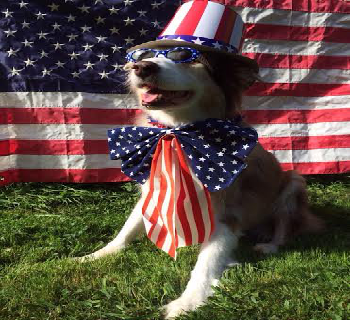

In [35]:
response = requests.get('https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg')
img = Image.open(BytesIO(response.content))
img.resize((350,320))

Indeed this dog celebrates the US Independence Day!

In [36]:
archive[archive.rating_numerator == 15]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
285  838916489579200512                    NaN                  NaN   
291  838085839343206401           8.380855e+17         2.894131e+09   

                     timestamp  \
285  2017-03-07 00:57:32 +0000   
291  2017-03-04 17:56:49 +0000   

                                                source  \
285  <a href="http://twitter.com/download/iphone" r...   
291  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
285  RT @KibaDva: I collected all the good dogs!! 1...         8.389060e+17   
291  @bragg6of8 @Andy_Pace_ we are still looking fo...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
285               811740824.0  2017-03-07 00:15:46 +0000   
291                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
285  https://twitter.com/KibaDva/status/83890598062...                15   
291                                                NaN                15   

     rating_denominator  name doggo floofer pupper puppo  
285                  10  None  None    None   None  None  
291                  10  None  None    None   None  None

In [37]:
# inspect rating numerator values
archive[archive.rating_numerator == 5]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
45    883482846933004288                    NaN                  NaN   
730   781661882474196992                    NaN                  NaN   
956   751583847268179968                    NaN                  NaN   
1399  699691744225525762                    NaN                  NaN   
1461  694925794720792577                    NaN                  NaN   
1508  691483041324204033                    NaN                  NaN   
1583  687102708889812993                    NaN                  NaN   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1619  684959798585110529                    NaN                  NaN   
1624  684880619965411328                    NaN                  NaN   
1645  683849932751646720                    NaN                  NaN   
1680  682003177596559360                    NaN                  NaN   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1727  679877062409191424                    NaN                  NaN   
1796  677301033169788928                    NaN                  NaN   
1808  676897532954456065                    NaN                  NaN   
1820  676588346097852417                    NaN                  NaN   
1861  675483430902214656                    NaN                  NaN   
1874  675135153782571009                    NaN                  NaN   
1901  674646392044941312                    NaN                  NaN   
1904  674632714662858753                    NaN                  NaN   
1925  674063288070742018                    NaN                  NaN   
1979  672980819271634944                    NaN                  NaN   
2013  672231046314901505                    NaN                  NaN   
2026  671879137494245376                    NaN                  NaN   
2063  671159727754231808                    NaN                  NaN   
2092  670782429121134593                    NaN                  NaN   
2109  670449342516494336                    NaN                  NaN   
2134  670069087419133954                    NaN                  NaN   
2139  670037189829525505                    NaN                  NaN   
2153  669661792646373376                    NaN                  NaN   
2181  668994913074286592                    NaN                  NaN   
2206  668631377374486528                    NaN                  NaN   
2242  667911425562669056                    NaN                  NaN   
2260  667550882905632768                    NaN                  NaN   
2312  666776908487630848                    NaN                  NaN   
2351  666049248165822465                    NaN                  NaN   

                      timestamp  \
45    2017-07-08 00:28:19 +0000   
730   2016-09-30 01:08:10 +0000   
956   2016-07-09 01:08:47 +0000   
1399  2016-02-16 20:28:06 +0000   
1461  2016-02-03 16:49:55 +0000   
1508  2016-01-25 04:49:38 +0000   
1583  2016-01-13 02:43:46 +0000   
1618  2016-01-07 05:28:35 +0000   
1619  2016-01-07 04:48:36 +0000   
1624  2016-01-06 23:33:58 +0000   
1645  2016-01-04 03:18:23 +0000   
1680  2015-12-30 01:00:03 +0000   
1689  2015-12-28 05:07:27 +0000   
1727  2015-12-24 04:11:37 +0000   
1796  2015-12-17 01:35:24 +0000   
1808  2015-12-15 22:52:02 +0000   
1820  2015-12-15 02:23:26 +0000   
1861  2015-12-12 01:12:54 +0000   
1874  2015-12-11 02:08:58 +0000   
1901  2015-12-09 17:46:48 +0000   
1904  2015-12-09 16:52:27 +0000   
1925  2015-12-08 03:09:46 +0000   
1979  2015-12-05 03:28:25 +0000   
2013  2015-12-03 01:49:05 +0000   
2026  2015-12-02 02:30:43 +0000   
2063  2015-11-30 02:52:03 +0000   
2092  2015-11-29 01:52:48 +0000   
2109  2015-11-28 03:49:14 +0000   
2134  2015-11-27 02:38:14 +0000   
2139  2015-11-27 00:31:29 +0000   
2153  2015-11-25 23:39:47 +0000   
2181  2015-11-24 03:29:51 +0000   
2206  2015-11-23 03:25:17 +0000   
2242  2015-11-21 03:44:27 +0000   
2260  2015-11-20 03:51:47 +0000   
2312  2015-11-18 00

Similarly, in the above rows some of them are not dog ratings, while some of them contain dog photos but the page puts a low score because of other random reasons captured in the photo. One of them that does not contain a dog photo, is the one with index number 1399, and as the text says this is Dave and is a tropical "pup" that lives underwater. Let's look how it looks like:

In [38]:
prediction[prediction.tweet_id == 699691744225525762]

tweet_id                                          jpg_url  \
896  699691744225525762  https://pbs.twimg.com/media/CbXN7aPWIAE0Xt1.jpg   

     img_num            p1   p1_conf  p1_dog        p2   p2_conf  p2_dog  \
896        1  hippopotamus  0.982269   False  sea_lion  0.006295   False   

         p3   p3_conf  p3_dog  
896  dugong  0.005768   False

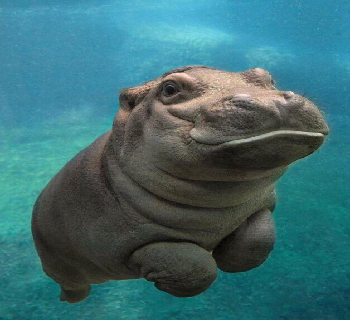

In [39]:
response = requests.get('https://pbs.twimg.com/media/CbXN7aPWIAE0Xt1.jpg')
img = Image.open(BytesIO(response.content))
img.resize((350,320))

In [40]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Also for the denominator, normally all values should be 10. However, we also see other values that they are most likely erroneous.

In [41]:
# inspect rating denominator values
archive[archive.rating_denominator == 170]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1120  731156023742988288                    NaN                  NaN   

                      timestamp  \
1120  2016-05-13 16:15:54 +0000   

                                                 source  \
1120  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1120  Say hello to this unbelievably well behaved sq...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1120                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1120  https://twitter.com/dog_rates/status/731156023...               204   

      rating_denominator  name doggo floofer pupper puppo  
1120                 170  this  None    None   None  None

Although it looks like erroneous, the post using a denominator of 170 is rating at the same time 17 dogs. 17 multiplied by 10 gives 170. In addition, it has a numerator of a 204 which results as 12/10 rating per dog, which is a vaild rating. Since, it takes time to inspect all of them one by one, maybe the best way to handle them is to keep only the ratings with 10 as a denominator. Let's look how the photo looks like:

In [42]:
prediction[prediction.tweet_id == 731156023742988288]

tweet_id                                          jpg_url  \
1148  731156023742988288  https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg   

      img_num        p1   p1_conf  p1_dog          p2   p2_conf  p2_dog  \
1148        1  lakeside  0.501767   False  breakwater  0.051351   False   

                p3   p3_conf  p3_dog  
1148  king_penguin  0.049444   False

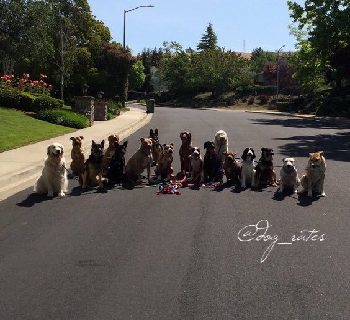

In [43]:
response = requests.get('https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg')
img = Image.open(BytesIO(response.content))
img.resize((350,320))

In [44]:
# inspect rating denominator values
archive[archive.rating_denominator == 0]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313  835246439529840640           8.352460e+17           26259576.0   

                     timestamp  \
313  2017-02-24 21:54:03 +0000   

                                                source  \
313  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
313  @jonnysun @Lin_Manuel ok jomny I know you're e...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
313                       NaN                        NaN           NaN   

     rating_numerator  rating_denominator  name doggo floofer pupper puppo  
313               960                   0  None  None    None   None  None

In [45]:
archive[archive.rating_denominator == 50]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1202  716439118184652801                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   

                      timestamp  \
1202  2016-04-03 01:36:11 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   

                                                 source  \
1202  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1202  This is Bluebert. He just saw that both #Final...                  NaN   
1274  From left to right:\nCletus, Jerome, Alejandro...                  NaN   
1351  Here is a whole flock of puppers.  60/50 I'll ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1202                       NaN                        NaN   
1274                       NaN                        NaN   
1351                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1202  https://twitter.com/dog_rates/status/716439118...                50   
1274  https://twitter.com/dog_rates/status/709198395...                45   
1351  https://twitter.com/dog_rates/status/704054845...                60   

      rating_denominator      name doggo floofer pupper puppo  
1202                  50  Bluebert  None    None   None  None  
1274                  50      None  None    None   None  None  
1351                  50         a  None    None   None  None

In this case above, denominator is 50. If we look at the first post we see that there is 50/50 in the text that is not the score, and later there is the actual score which is 11/10. Thus, the wrong number is identified as a score.
- keep only scores to which denominator is 10

In [46]:
# check for duplcated rows
(archive.duplicated()).sum()

0

In [47]:
# check for duplicated tweet ids
archive.tweet_id.value_counts().head()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
Name: tweet_id, dtype: int64

In [48]:
archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/832369877331693569/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/844704788403113984/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/667866724293877760/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/816450570814898180/photo/1,https://twitter.com/dog_rates/status/816450570814898180/photo/1                                                                                          

We see that some of the urls appear twice in the archive dataset and we can also notice that some instances contain multiple urls.

In [49]:
# inspect url that appears twice
archive[archive.expanded_urls == 'https://twitter.com/dog_rates/status/832369877331693569/photo/1']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
230  847978865427394560                    NaN                  NaN   
338  832369877331693569                    NaN                  NaN   

                     timestamp  \
230  2017-04-01 01:08:10 +0000   
338  2017-02-16 23:23:38 +0000   

                                                source  \
230  <a href="http://twitter.com/download/iphone" r...   
338  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
230  RT @dog_rates: This is Charlie. He fell asleep...         8.323699e+17   
338  This is Charlie. He fell asleep on a heating v...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
230              4.196984e+09  2017-02-16 23:23:38 +0000   
338                       NaN                        NaN   

                                         expanded_urls  rating_numerator  \
230  https://twitter.com/dog_rates/status/832369877...                11   
338  https://twitter.com/dog_rates/status/832369877...                11   

     rating_denominator     name doggo floofer pupper puppo  
230                  10  Charlie  None    None   None  None  
338                  10  Charlie  None    None   None  None

We see that some of the expanded urls are recorded two times. However, there are no duplicated tweet id's as we saw earlier, so there is no error of duplicated instances with the same id. When we look at the records to which the url is duplicated what we see is that it is a retweet of the original post. The retweets as we mentioned earlier will not be part of the analysis, only the original posts, which is something that needs to be fixed.

Something else we notice is that some of the expanded urls contain multiple urls separated by a comma. When I inspect some of these instances that contain multiple urls I see that some of them is the same url repeated, because the post contains more than one photos; while other times it is a url from a different page and not twitter, for example from vine.co. And some other times there is an additional url from gofundme.com that is page that helps raise money for dogs with health issues.

In [50]:
# inspect url from a different page
archive[archive.expanded_urls == 'https://vine.co/v/ixa1ejbXiM7']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1146  727155742655025152                    NaN                  NaN   

                      timestamp  \
1146  2016-05-02 15:20:13 +0000   

                                                 source  \
1146  <a href="http://vine.co" rel="nofollow">Vine -...   

                                                   text  retweeted_status_id  \
1146  When you're trying to enjoy yourself but end u...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1146                       NaN                        NaN   

                      expanded_urls  rating_numerator  rating_denominator  \
1146  https://vine.co/v/ixa1ejbXiM7                11                  10   

      name doggo floofer pupper puppo  
1146  None  None    None   None  None

In [51]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

We notice that the source of these tweet's is from vine.co. And there are 91 instances from this source. If we look at the source we can see that it was a short video hosting that was used in twitter.

In [52]:
archive[archive.source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>']

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
529   808344865868283904                    NaN                  NaN   
562   802600418706604034                    NaN                  NaN   
657   791774931465953280                    NaN                  NaN   
672   789903600034189313                    NaN                  NaN   
699   786286427768250368                    NaN                  NaN   
713   784183165795655680                    NaN                  NaN   
714   784057939640352768                    NaN                  NaN   
731   781655249211752448                    NaN                  NaN   
733   781308096455073793                    NaN                  NaN   
746   780074436359819264                    NaN                  NaN   
783   775350846108426240                    NaN                  NaN   
881   760521673607086080                    NaN                  NaN   
886   759943073749200896                    NaN                  NaN   
905   758099635764359168                    NaN                  NaN   
939   753039830821511168                    NaN                  NaN   
941   752932432744185856                    NaN                  NaN   
946   752568224206688256                    NaN                  NaN   
951   751950017322246144                    NaN                  NaN   
954   751793661361422336                    NaN                  NaN   
985   749075273010798592                    NaN                  NaN   
996   748337862848962560                    NaN                  NaN   
999   748220828303695873                    NaN                  NaN   
1006  747648653817413632                    NaN                  NaN   
1011  747439450712596480                    NaN                  NaN   
1020  746757706116112384                    NaN                  NaN   
1022  746542875601690625                    NaN                  NaN   
1033  745074613265149952                    NaN                  NaN   
1051  742534281772302336                    NaN                  NaN   
1062  741099773336379392                    NaN                  NaN   
1075  739623569819336705                    NaN                  NaN   
...                  ...                    ...                  ...   
1482  693267061318012928                    NaN                  NaN   
1502  692041934689402880                    NaN                  NaN   
1505  691793053716221953                    NaN                  NaN   
1515  690989312272396288                    NaN                  NaN   
1528  690348396616552449                    NaN                  NaN   
1534  689993469801164801                    NaN                  NaN   
1549  689255633275777024                    NaN                  NaN   
1566  687841446767013888                    NaN                  NaN   
1570  687732144991551489                    NaN                  NaN   
1577  687399393394311168                    NaN                  NaN   
1586  686760001961103360                    NaN                  NaN   
1592  686394059078897668                    NaN                  NaN   
1596  686286779679375361                    NaN                  NaN   
1625  684830982659280897                    NaN                  NaN   
1628  684588130326986752                    NaN                  NaN   
1640  684147889187209216                    NaN                  NaN   
1650  683515932363329536                    NaN                  NaN   
1676  682088079302213632                    NaN                  NaN   
1706  680805554198020098                    NaN                  NaN   
1728  679872969355714560                    NaN                  NaN   
1743  679405845277462528                    NaN                  NaN   
1750  679001094530465792                    NaN                  NaN   
1760  678708137298427904                    NaN                  NaN   
1776  677961670166224897                    NaN         

We can also look at the in_reply_to columns.

In [53]:
archive[archive.in_reply_to_status_id.isnull() == 0]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
149   863079547188785154           6.671522e+17         4.196984e+09   
179   857214891891077121           8.571567e+17         1.806710e+08   
184   856526610513747968           8.558181e+17         4.196984e+09   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
251   844979544864018432           7.590995e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
565   802265048156610565           7.331095e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
...                  ...                    ...                  ...   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1501  692142790915014657           6.920419e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1630  684538444857667585           6.844811e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1842  675870721063669760           6.757073e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1852  675707330206547968           6.754971e+17         4.196984e+09   
1866  675349384339542016           6.749998e+17         4.196984e+09   
1882  674999807681908736           6.747934e+17         4.196984e+09   
1885  674793399141146624           6.717299e+17         4.196984e+09   
1892  674754018082705410           6.747522e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

We notice that most of the instances to which there is a reply to a tweet do not have the url values. For the instances that contain a url: for example the one with index number 1501, this is a reply of the WeRateDogs page to its original tweet that verifies the score with some new photos of the dog, e.g. 

https://twitter.com/dog_rates/status/692142790915014657

Or for example the one with index number 251, this is a reply of the WeRateDogs page to its first tweet that contains an update of the score of the dog, including some additional photos.

For the rest of the instances that do not contain a url, I looked in the json text file. But also there, the urls are not included. I can use the tweet id to identify the url. For example, for the first one of the table above:
"@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution",
we can see that this a reply of the WeRateDogs user to another user regarding a dog photo:

https://twitter.com/dog_rates/status/886267009285017600

Similar for the first 4 instances of the table above. They are all replies to other users' photos and not original tweets from the WeRateDogs page. We can assume that the instances without a url are replies of the WeRateDogs to other users.

One idea to handle this is to not include the replies in our analysis and keep only the original posts of the page.

Furthermore, we can check if these instances are contained in the prediction dataset:

In [54]:
# reply tweet that does not contain a url, e.g. index number 30
(prediction.tweet_id == 886267009285017600).any()

False

In [55]:
# reply tweet that contains a url, e.g. index number 1501
(prediction.tweet_id == 692142790915014657).any()

True

Indeed, we can see that the replies to other users are not contained in the prediction file, while the replies of the WeRateDogs page to itself (e.g. verifications or upgrades in score) are contained in the prediction file. I will however keep only the original posts, so the best way to handle this is to not include in my analysis the tweets that are replies.

In [56]:
# check all rows that do not contain url information
archive[archive.expanded_urls.isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

The majority of the instances that do not record the url are tweet replies! I can look from these instances which ones are not tweet replies.

In [57]:
archive[archive.expanded_urls.isnull()][archive[archive.expanded_urls.isnull()].in_reply_to_status_id.isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
185   856330835276025856                    NaN                  NaN   
375   828361771580813312                    NaN                  NaN   
707   785515384317313025                    NaN                  NaN   
1445  696518437233913856                    NaN                  NaN   

                      timestamp  \
185   2017-04-24 02:15:55 +0000   
375   2017-02-05 21:56:51 +0000   
707   2016-10-10 16:20:36 +0000   
1445  2016-02-08 02:18:30 +0000   

                                                 source  \
185   <a href="http://twitter.com/download/iphone" r...   
375   <a href="http://twitter.com" rel="nofollow">Tw...   
707   <a href="http://twitter.com/download/iphone" r...   
1445  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
185   RT @Jenna_Marbles: @dog_rates Thanks for ratin...         8.563302e+17   
375   Beebop and Doobert should start a band 12/10 w...                  NaN   
707      Today, 10/10, should be National Dog Rates Day                  NaN   
1445    Oh my god 10/10 for every little hot dog pupper                  NaN   

      retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
185                 66699013.0  2017-04-24 02:13:14 +0000           NaN   
375                        NaN                        NaN           NaN   
707                        NaN                        NaN           NaN   
1445                       NaN                        NaN           NaN   

      rating_numerator  rating_denominator  name doggo floofer  pupper puppo  
185                 14                  10  None  None    None    None  None  
375                 12                  10  None  None    None    None  None  
707                 10                  10  None  None    None    None  None  
1445                10                  10  None  None    None  pupper  None

Only 4 of the instances that do not have a url are not replies. One out of the four is a retweet. So it is only 3 tweets that do not have a url.

One idea to find the urls is to use the twitter API. I can use the:

temp_data_json['entities']['media'][0]['expanded_url']

to read the urls from the json text file, similarly to retweet and favorite count in the for loop earlier.
However, I discover that I get a key error. The reason is that there is no media url in the json text files for these specific tweets.

Alternatively I can use the tweet id. For example, the one with index number 707, the tweet url is (the last part of the url is the tweet id):

https://twitter.com/dog_rates/status/785515384317313025

It is a status tweet that do not contain any media (photo), because it only refers to the date Oct 10, and is not a dog rating. Similar for the rest two tweets, they are not dog ratings and do not contain any media.

Thus, all the instances in the archive without a url are either replies and retweets or status updates without any media (not dog ratings).

I can further verify this and check if the 3 tweets are contained in the prediction dataset:

In [58]:
(prediction.tweet_id == 828361771580813312).any(), (prediction.tweet_id == 785515384317313025).any(), (prediction.tweet_id == 696518437233913856).any()

(False, False, False)

Indeed as expected they are not contained in the prediction dataset.
- Clean instances that do not contain a url

In [59]:
# inspect dog name
archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Lola             10
Tucker           10
Penny            10
Bo                9
Winston           9
Sadie             8
the               8
Daisy             7
Bailey            7
an                7
Toby              7
Buddy             7
Bella             6
Jax               6
Jack              6
Rusty             6
Scout             6
Leo               6
Dave              6
Koda              6
Oscar             6
Milo              6
Stanley           6
Sammy             5
               ... 
Puff              1
Tater             1
Sage              1
Cal               1
Huck              1
Ito               1
Fwed              1
Grizzie           1
Chase             1
Bloop             1
Noah              1
Filup             1
Franq             1
Nida              1
Cedrick           1
Claude            1
Brandy            1
Bertson           1
Bauer             1


Earlier in the visual assessment, we identified the issues of using "None" as a name, or invalid names like "such". In the programmatic assessment, we can see more invalid names like "a". This is most likely due to the fact that in most of the tweet's text, the page uses the expression: "This is" followed by the name of the dog. However, if in same cases the page does not give a name, rather it specifies the dog breed, for example, "this is" is then followed by "a" and then the dog breed (or something else). If the algorithm used to identify the dog names used the expression "this is" then it results in many errors - like the "a" erroneously have been assumed as a name -.

In [60]:
archive.doggo.unique(), archive.floofer.unique(), archive.pupper.unique(), archive.puppo.unique(), 

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [61]:
# find dog type in text; sometimes capital letter might be used so I lowercase the text first
archive[archive.text.str.lower().str.contains('puppo')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
12    889665388333682689                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
71    878776093423087618                    NaN                  NaN   
85    876120275196170240                    NaN                  NaN   
94    874012996292530176                    NaN                  NaN   
106   871879754684805121                    NaN                  NaN   
129   867421006826221569                    NaN                  NaN   
134   866686824827068416                    NaN                  NaN   
168   859607811541651456                    NaN                  NaN   
172   858843525470990336                    NaN                  NaN   
191   855851453814013952                    NaN                  NaN   
228   848213670039564288           8.482121e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
296   837366284874571778                    NaN                  NaN   
395   825535076884762624                    NaN                  NaN   
397   825120256414846976                    NaN                  NaN   
398   825026590719483904                    NaN                  NaN   
413   822872901745569793                    NaN                  NaN   
438   820013781606658049                    NaN                  NaN   
439   819952236453363712                    NaN                  NaN   
469   816829038950027264                    NaN                  NaN   
545   805826884734976000                    NaN                  NaN   
546   805823200554876929                    NaN                  NaN   
554   803773340896923648                    NaN                  NaN   
567   802239329049477120                    NaN                  NaN   
615   796563435802726400                    NaN                  NaN   
643   793195938047070209                    NaN                  NaN   
663   790946055508652032                    NaN                  NaN   
689   787717603741622272                    NaN                  NaN   
701   786051337297522688           7.727430e+17         7.305050e+17   
713   784183165795655680                    NaN                  NaN   
736   780931614150983680                    NaN                  NaN   
922   756275833623502848                    NaN                  NaN   
947   752519690950500352                    NaN                  NaN   
961   751132876104687617                    NaN                  NaN   
1035  744995568523612160                    NaN                  NaN   
1048  743253157753532416                    NaN                  NaN   
1083  738537504001953792                    NaN                  NaN   

                      timestamp  \
12    2017-07-25 01:55:32 +0000   
14    2017-07-24 17:02:04 +0000   
71    2017-06-25 00:45:22 +0000   
85    2017-06-17 16:52:05 +0000   
94    2017-06-11 21:18:31 +0000   
106   2017-06-06 00:01:46 +0000   
129   2017-05-24 16:44:18 +0000   
134   2017-05-22 16:06:55 +0000   
168   2017-05-03 03:17:27 +0000   
172   2017-05-01 00:40:27 +0000   
191   2017-04-22 18:31:02 +0000   
228   2017-04-01 16:41:12 +0000   
274   2017-03-11 22:59:09 +0000   
296   2017-03-02 18:17:34 +0000   
395   2017-01-29 02:44:34 +0000   
397   2017-01-27 23:16:13 +0000   
398   2017-01-27 17:04:02 +0000   
413   2017-01-21 18:26:02 +0000   
438   2017-01-13 21:04:55 +0000   
439   2017-01-13 17:00:21 +0000   
469   2017-01-05 02:09:53 +0000   
545   2016-12-05 17:31:15 +0000   
546   2016-12-05 17:16:37 +0000   
554   2016-11-30 01:31:12 +0000   
567   2016-11-25 19:55:35 +0000   
615   2016-11-10 04:01:37 +0000   
643   2016-10-31 21:00:23 +0000   
663   2016-10-25 16:00:09 +0000   
689   2016-10-16 18:11:26 +0000   
701   2016-10-12 03:50:17 +0000   
713   2016-10-07 00:06:50 +0000   
736   2016-09-28 00:46:20 +0000   
922   2016-07-21 23:53:04 +0000   
947   2016-07-11 

We can see that all these instances contain the word 'puppo' in the text, but this is not always recorded in the last column. For example, in one of the tweet's it is hidden in the word 'supupporting'.

In [62]:
sum(archive.text.str.lower().str.contains('puppo')), sum(archive.puppo.str.contains('puppo'))

(38, 30)

The word 'puppo' is contained in 38 tweets and is recorded only 30 times in the puppo column. For the other dog types:

In [63]:
sum(archive.text.str.lower().str.contains('pupper')), sum(archive.pupper.str.contains('pupper'))

(283, 257)

In [64]:
sum(archive.text.str.lower().str.contains('floofer')), sum(archive.floofer.str.contains('floofer'))

(10, 10)

In [65]:
sum(archive.text.str.lower().str.contains('doggo')), sum(archive.doggo.str.contains('doggo'))

(107, 97)

#### Prediction dataset

#### Visual Assessment

In [66]:
prediction

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

One first issue we can see from the visual assessment is that columns names e.g. p1, p1_conf, p1_dog are not clear what they are and should be more descriptive.

However, we can also see tidiness issues.
We have multiple columns for predictions, confidence on the predictions, and whether predictions are dogs or not.
We know that each variable should form a column.
Thus, the three predictions should be in one column, the three confidence columns in one column and the three true/false columns also in one column.

Also it looks like some urls are videos.

Finally, we can also see that the image predictions dataset has 2075 rows, thus, it is smaller than the archive file.

#### Programmatic Assessment

In [67]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


We can see a quality issue regarding the datatype of the tweet_id; it is preferable to have it as a string since no calculations are performed in the id.

In [68]:
# see if there are any duplicate ids
prediction.tweet_id.duplicated().any()

False

In [69]:
prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        18
Maltese_dog                   18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [70]:
prediction.p1_dog.unique(), prediction.p2_dog.unique(), prediction.p3_dog.unique()

(array([ True, False]), array([ True, False]), array([ True, False]))

In [71]:
prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

It looks like all confidence values are between 0 and 1, with some very small values in the cases of p2 and p3 predictions.

In [72]:
prediction[prediction.p2_conf == 1.011300e-08]

tweet_id                                          jpg_url  \
106  667866724293877760  https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg   

     img_num             p1  p1_conf  p1_dog          p2       p2_conf  \
106        1  jigsaw_puzzle      1.0   False  prayer_rug  1.011300e-08   

     p2_dog       p3       p3_conf  p3_dog  
106   False  doormat  1.740170e-10   False

The case to which the predictions p2 and p3 are very small is when the prediction p1 equals to 1, which predicts a puzzle and not a dog. If we look at the photo indeed we can see a puzzle and at the back a dog. So the algorithm is not able to identify the dog. However it identifies the puzzle!

In [73]:
prediction.p2_conf.sort_values().head()

106     1.011300e-08
1299    1.002880e-05
1229    1.448950e-05
230     1.763430e-05
1372    2.335910e-05
Name: p2_conf, dtype: float64

In [74]:
prediction[prediction.p2_conf == 1.002880e-05]

tweet_id                                          jpg_url  \
1299  752519690950500352  https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg   

      img_num     p1   p1_conf  p1_dog                  p2  p2_conf  p2_dog  \
1299        3  swing  0.999984   False  Labrador_retriever  0.00001    True   

              p3   p3_conf  p3_dog  
1299  Eskimo_dog  0.000001    True

Similarly, in this case the algorithm fails to identify the dog in the first prediction, whith a very high confidence. However, it identifies that the dog is a labrador retirever in the second prediction - which is likely correct - with a very low confidence about the prediction.

In any case, all the confidence values are between 0 and 1, which is correct.

In [75]:
# check how many urls are videos
sum(prediction.jpg_url.str.contains('video'))

84

In [76]:
# check if all urls are saved as images
sum(prediction.jpg_url.str.contains('.jpg'))

2073

The video urls have also been saved as .jpg files, probably containing just a screenshot from the video. The total number of urls is 2075, thus 2 of them are not saved as .jpg.

In [77]:
# check these two instances
prediction[~prediction.jpg_url.str.contains('.jpg')]

tweet_id                                            jpg_url  \
320  671789708968640512  https://pbs.twimg.com/tweet_video_thumb/CVKtH-...   
815  692752401762250755  https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...   

     img_num         p1   p1_conf  p1_dog              p2   p2_conf  p2_dog  \
320        1  dalmatian  0.114259    True           teddy  0.062275   False   
815        1    Samoyed  0.471276    True  Siberian_husky  0.158850    True   

                   p3   p3_conf  p3_dog  
320  steam_locomotive  0.049700   False  
815        Eskimo_dog  0.138672    True

In [78]:
prediction.jpg_url.loc[320]

'https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png'

In [79]:
prediction.jpg_url.loc[815]

'https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png'

It looks like these two files are saved as .png files instead of .jpg, and they are both video thumbs. I will remove those two instances, but keep the rest of the video thumbs that are saved as jpg.

In [80]:
# check duplicated urls
prediction.jpg_url.duplicated().any()

True

In [81]:
prediction[prediction.jpg_url.duplicated()].head()

tweet_id                                            jpg_url  \
1297  752309394570878976  https://pbs.twimg.com/ext_tw_video_thumb/67535...   
1315  754874841593970688    https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   
1333  757729163776290825    https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg   
1345  759159934323924993    https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg   
1349  759566828574212096    https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg   

      img_num                  p1   p1_conf  p1_dog                p2  \
1297        1             upright  0.303415   False  golden_retriever   
1315        1                 pug  0.272205    True      bull_mastiff   
1333        2        cash_machine  0.802333   False        schipperke   
1345        1       Irish_terrier  0.254856    True            briard   
1349        1  Labrador_retriever  0.967397    True  golden_retriever   

       p2_conf  p2_dog                           p3   p3_conf  p3_dog  
1297  0.181351    True             Brittany_spaniel  0.162084    True  
1315  0.251530    True                   bath_towel  0.116806   False  
1333  0.045519    True              German_shepherd  0.023353    True  
1345  0.227716    True  soft-coated_wheaten_terrier  0.223263    True  
1349  0.016641    True                     ice_bear  0.014858   False

In [82]:
prediction[prediction.jpg_url == 'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

tweet_id                                          jpg_url  \
591   679158373988876288  https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   
1315  754874841593970688  https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg   

      img_num   p1   p1_conf  p1_dog            p2  p2_conf  p2_dog  \
591         1  pug  0.272205    True  bull_mastiff  0.25153    True   
1315        1  pug  0.272205    True  bull_mastiff  0.25153    True   

              p3   p3_conf  p3_dog  
591   bath_towel  0.116806   False  
1315  bath_towel  0.116806   False

In [83]:
prediction[prediction.jpg_url == 'https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg']

tweet_id                                          jpg_url  \
587   679062614270468097  https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg   
1333  757729163776290825  https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg   

      img_num            p1   p1_conf  p1_dog          p2   p2_conf  p2_dog  \
587         2  cash_machine  0.802333   False  schipperke  0.045519    True   
1333        2  cash_machine  0.802333   False  schipperke  0.045519    True   

                   p3   p3_conf  p3_dog  
587   German_shepherd  0.023353    True  
1333  German_shepherd  0.023353    True

These instances all have duplicated urls but different ids! When I look at the posts using the ids, I see that one of the ids redirects to the other one.

In [84]:
archive[archive.tweet_id == 679062614270468097]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1748  679062614270468097                    NaN                  NaN   

                      timestamp  \
1748  2015-12-21 22:15:18 +0000   

                                                 source  \
1748  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1748  This is Chompsky. He lives up to his name. 11/...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1748                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1748  https://twitter.com/dog_rates/status/679062614...                11   

      rating_denominator      name doggo floofer pupper puppo  
1748                  10  Chompsky  None    None   None  None

In [85]:
archive[archive.tweet_id == 757729163776290825]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
908  757729163776290825                    NaN                  NaN   

                     timestamp  \
908  2016-07-26 00:08:05 +0000   

                                                source  \
908  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
908  RT @dog_rates: This is Chompsky. He lives up t...         6.790626e+17   

     retweeted_status_user_id retweeted_status_timestamp  \
908              4.196984e+09  2015-12-21 22:15:18 +0000   

                                         expanded_urls  rating_numerator  \
908  https://twitter.com/dog_rates/status/679062614...                11   

     rating_denominator      name doggo floofer pupper puppo  
908                  10  Chompsky  None    None   None  None

If I look at the archive, I see that one is the original post and the second is retweet. There are different ways to handle this. For example, when I clean the data and remove all retweets from the archive and then keep only tweet ids in prediction dataset that are recorded in the archive, I will probably avoid all the duplicated urls from the prediction file. Or I can remove the duplicated urls from the prediction file. I can re-assess that later.

In [86]:
sum(prediction.jpg_url.duplicated())

66

#### Twitter API dataset

#### Visual Assessment

In [87]:
tweet_api_data

tweet_id  retweet_count  favorite_count
0     892420643555336193           8206           37640
1     892177421306343426           6071           32349
2     891815181378084864           4012           24369
3     891689557279858688           8367           40963
4     891327558926688256           9063           39168
5     891087950875897856           3009           19694
6     890971913173991426           1988           11517
7     890729181411237888          18234           63505
8     890609185150312448           4129           27081
9     890240255349198849           7127           31034
10    890006608113172480           7086           29859
11    889880896479866881           4815           27062
12    889665388333682689           9705           46792
13    889638837579907072           4382           26379
14    889531135344209921           2176           14714
15    889278841981685760           5199           24569
16    888917238123831296           4354           28346
17    888804989199671297           4136           24863
18    888554962724278272           3422           19290
19    888078434458587136           3369           21173
20    887705289381826560           5201           29385
21    887517139158093824          11313           45038
22    887473957103951883          17553           67069
23    887343217045368832          10078           32763
24    887101392804085760           5762           29756
25    886983233522544640           7512           34167
26    886736880519319552           3159           11717
27    886680336477933568           4318           21843
28    886366144734445568           3096           20616
29    886267009285017600              4             116
...                  ...            ...             ...
2309  666411507551481857            320             430
2310  666407126856765440             38             105
2311  666396247373291520             82             162
2312  666373753744588802             88             183
2313  666362758909284353            558             756
2314  666353288456101888             71             213
2315  666345417576210432            132             284
2316  666337882303524864             88             192
2317  666293911632134144            343             488
2318  666287406224695296             63             142
2319  666273097616637952             76             169
2320  666268910803644416             35             100
2321  666104133288665088           6346           13963
2322  666102155909144576             11              77
2323  666099513787052032             65             150
2324  666094000022159362             71             160
2325  666082916733198337             44             113
2326  666073100786774016            158             314
2327  666071193221509120             58             142
2328  666063827256086533            212             462
2329  666058600524156928             57             109
2330  666057090499244032            138             286
2331  666055525042405380            235             426
2332  666051853826850816            827            1191
2333  666050758794694657             57             130
2334  666049248165822465             42             105
2335  666044226329800704            136             289
2336  666033412701032449             43             121
2337  666029285002620928             46             125
2338  666020888022790149            496            2514

[2339 rows x 3 columns]

There is a tidiness issue. We recall that each type of observetional unit forms a table. This dataset can be part of the archive dataset, since it contains information for the tweets that are included in the archive dataset.
From the visual assessment, we can see that the size of the dataset is 2339 rows. While the archive dataset has 2356 rows. This is due to tweets that may have been deleted (these are the exceptions we gathered in the for-loop earlier and can be found in the tweet_errors dictionary).

#### Programmatic Assessment

In [88]:
tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null object
retweet_count     2339 non-null int64
favorite_count    2339 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


#### Summary of quality and tidiness issues

At least 8 quality and 2 tidiness issues need to be fixed. For the issues that I identified in the assessment steps earlier, I will fix most of them in the following cleaning section. I summarize here the issues that I will fix:

<u>Quality issues</u>

1. Replies and retweets (archive dataset)
2. Rows that do not include a url
3. Datatype issues for tweet_id and timestamp
4. Dog types that are contained in the tweet text but are not recorded in the dog type columns
5. Fix numerator values
6. Fix denominator values
7. Names and dog types that are recored as "None"
8. Fix erroneous names
9. Datatype issue of tweet_id (prediction dataset)
10. Fix urls that come from other sources than twitter as well as multiple urls per row
11. Png image format instead of jpg format (prediction dataset)
12. Duplicate urls (prediction dataset)
13. Fix retweet and favorite counts with null values (this is something identified after fixing the tidiness issues below)

<u>Tidiness issues</u>

1. Dog types are one variable and should be in one column (archive dataset)
2. Predictions are one variable; Confidence are one variable; Dog prediction are one variable; all these are spread in multiple columns: each variable should form one column (prediction dataset)
3. Archive dataset and additional data from Twitter API dataset are one type of observational unit and should be combined

<a id='data_cleaning'></a>
### 3. Data Cleaning

For the data cleaning I will follow the structure:
- Define the cleaning task
- Code
- Test

All the quality and tidiness issues summarized above will be fixed as described in the assessment section earlier.

Before I start the cleaning of the data I will make a copy of each dataset.

In [89]:
archive_clean = archive.copy()
prediction_clean = prediction.copy()
tweet_api_data_clean = tweet_api_data.copy()

### <u>Clean quality issues</n>

#### <i>Quality issue 1</i>

#### Define:
Remove from archive_clean the rows and columns that contain the: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, using drop function.

#### Code:

In [90]:
# get indexes for the rows that are either replies or retweets
row_index_to_drop = archive_clean[(archive_clean.in_reply_to_status_id.isnull() != 1) | (archive_clean.retweeted_status_id.isnull() != 1)].index

In [91]:
len(row_index_to_drop)

259

In [92]:
# drop rows
archive_clean.drop(row_index_to_drop, axis=0, inplace=True)

In [93]:
# drop columns
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace = True)

#### Test:

In [94]:
# check info for ORIGINAL dataset
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [95]:
# check info of CLEANED dataset
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


In [96]:
# subtract the deleted rows from the initial length
2356 - 259

2097

Indeed, we can see that the number of rows in the cleaned dataset are now 2097, and that the reply and retweet columns have been successfully removed.

We also see that there are now only 3 instances without a url. These are the ones that have been identified earlier in the assessment part (that are not replies nor retweets), which they do not contain photos (media) and they are also not included in the prediction file. I will remove them.

#### <i>Quality issue 2</i>

#### Define:
Remove the rows without a url, using drop function.

#### Code:

In [97]:
row_index_to_drop = archive_clean[archive_clean.expanded_urls.isnull() != 0].index
row_index_to_drop

Int64Index([375, 707, 1445], dtype='int64')

In [98]:
archive_clean.drop(row_index_to_drop, axis=0, inplace=True)

#### Test:

In [99]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


Null expanded urls have been dropped.

#### <i>Quality issue 3</i>

#### Define:
Datatype issues: convert tweet_id datatype from int to string using astype function, and timestamp from string to datetime using to_datetime function.

#### Code:

In [100]:
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)

In [101]:
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

#### Test:

In [102]:
archive_clean.head(2)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None  
1                  10    Tilly  None    None   None  None

In [103]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns, UTC]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 212.7+ KB


#### <i>Quality issue 4<i/>

We recognized earlier in the assessment that sometimes the dog type is contained in the text but not in the columns. However, since many rows have been cleaned from the dataset I will do a re-assessment to verify that this is stil the case.

<u>Re-assess:<u/>

In [104]:
sum(archive_clean.text.str.lower().str.contains('doggo')), sum(archive_clean.doggo.str.contains('doggo'))

(91, 83)

In [105]:
sum(archive_clean.text.str.lower().str.contains('floofer')), sum(archive_clean.floofer.str.contains('floofer'))

(10, 10)

In [106]:
sum(archive_clean.text.str.lower().str.contains('pupper')), sum(archive_clean.pupper.str.contains('pupper'))

(254, 229)

In [107]:
sum(archive_clean.text.str.lower().str.contains('puppo')), sum(archive_clean.puppo.str.contains('puppo'))

(30, 24)

Indeed the re-assessment shows that his is still an issue for the doggo, pupper and puppo types.

#### Define:
Some of the dog types that are contained in the text of the tweets are not recorded in the dog type columns. Find indexes of rows that the puppo, pupper and doggo are in the text. Then use .loc and the index to set the values of the dog type columns with the correct dog type values.

In [108]:
# index of rows that 'puppo' is in the text
aa = archive_clean[archive_clean.text.str.lower().str.contains('puppo')].index

In [109]:
bb = archive_clean[archive_clean.text.str.lower().str.contains('pupper')].index

In [110]:
cc = archive_clean[archive_clean.text.str.lower().str.contains('doggo')].index

In [111]:
# set the correct values in dog type columns for the indexes above
archive_clean.loc[aa, 'puppo'] = 'puppo'
archive_clean.loc[bb, 'pupper'] = 'pupper'
archive_clean.loc[cc, 'doggo'] = 'doggo'

#### Test:

In [112]:
sum(archive_clean.text.str.lower().str.contains('puppo')), sum(archive_clean.puppo.str.contains('puppo'))

(30, 30)

In [113]:
sum(archive_clean.text.str.lower().str.contains('pupper')), sum(archive_clean.pupper.str.contains('pupper'))

(254, 254)

In [114]:
sum(archive_clean.text.str.lower().str.contains('floofer')), sum(archive_clean.floofer.str.contains('floofer'))

(10, 10)

In [115]:
sum(archive_clean.text.str.lower().str.contains('doggo')), sum(archive_clean.doggo.str.contains('doggo'))

(91, 91)

In [116]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns, UTC]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 292.7+ KB


#### <i>Quality  issue 5</i>

#### Define:
Fix numerator values. Keep only those rows that have numerator values between 8 and 14 and remove the rest using drop function.

#### Code:

In [117]:
row_index_to_drop = []
count = 0
for i in archive_clean.rating_numerator:
    if ((i<8)|(i>14)):
        row_index_to_drop.append(archive_clean.index[count])
    count +=1

In [118]:
len(row_index_to_drop)

186

In [119]:
archive_clean.drop(row_index_to_drop, axis=0, inplace=True)

#### Test:

In [120]:
archive_clean.shape

(1908, 12)

In [121]:
# verify size
2094-186

1908

In [122]:
# verify that numerator values are between 8 and 14
archive_clean.rating_numerator.unique()

array([13, 12, 14, 11, 10,  8,  9], dtype=int64)

#### <i>Quality issue 6</i>

We also need to fix the denominator values that are different than 10. Now that we have fixed the numerator values, re-assess that there are denominator values different than 10.

<u>Re-assess:</u>

In [123]:
archive_clean.rating_denominator.unique()

array([10, 11], dtype=int64)

Indeed, most of the denominator values have been fixed except of the value 11.

In [124]:
archive_clean[archive_clean.rating_denominator == 11]

tweet_id                 timestamp  \
1068  740373189193256964 2016-06-08 02:41:38+00:00   

                                                 source  \
1068  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
1068  After so many requests, this is Bretagne. She ...   

                                          expanded_urls  rating_numerator  \
1068  https://twitter.com/dog_rates/status/740373189...                 9   

      rating_denominator  name doggo floofer pupper puppo  
1068                  11  None  None    None   None  None

By inspecting this post, we see that there is a date in the post that is mistaken recorded as a score. The actual score is 14/10. I will fix it manually, since it is only one instance.

#### Define:
Fix instance with denominator 11 to 10 and numerator from 9 to 14.

#### Code:

In [125]:
archive_clean.loc[1068, 'rating_denominator'] = 10

In [126]:
archive_clean.loc[1068, 'rating_numerator'] = 14

#### Test:

In [127]:
archive_clean.rating_denominator.unique()

array([10], dtype=int64)

In [128]:
archive_clean[archive_clean.tweet_id == '740373189193256964']

tweet_id                 timestamp  \
1068  740373189193256964 2016-06-08 02:41:38+00:00   

                                                 source  \
1068  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
1068  After so many requests, this is Bretagne. She ...   

                                          expanded_urls  rating_numerator  \
1068  https://twitter.com/dog_rates/status/740373189...                14   

      rating_denominator  name doggo floofer pupper puppo  
1068                  10  None  None    None   None  None

Reset index, so that it counts from 0 to 1907.

In [129]:
archive_clean.reset_index(drop = True, inplace = True)

In [130]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 12 columns):
tweet_id              1908 non-null object
timestamp             1908 non-null datetime64[ns, UTC]
source                1908 non-null object
text                  1908 non-null object
expanded_urls         1908 non-null object
rating_numerator      1908 non-null int64
rating_denominator    1908 non-null int64
name                  1908 non-null object
doggo                 1908 non-null object
floofer               1908 non-null object
pupper                1908 non-null object
puppo                 1908 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 179.0+ KB


#### <i>Quality issue 7</i>

#### Define:
Fix "None" names and dog types. Use replace and np.NaN functions.

#### Code:

In [131]:
col_to_fix = ['name', 'puppo', 'pupper', 'doggo', 'floofer']

In [132]:
for column_name in col_to_fix:
    archive_clean[column_name].replace('None', np.NaN, inplace = True)

#### Test:

In [133]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 12 columns):
tweet_id              1908 non-null object
timestamp             1908 non-null datetime64[ns, UTC]
source                1908 non-null object
text                  1908 non-null object
expanded_urls         1908 non-null object
rating_numerator      1908 non-null int64
rating_denominator    1908 non-null int64
name                  1389 non-null object
doggo                 89 non-null object
floofer               10 non-null object
pupper                231 non-null object
puppo                 30 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 179.0+ KB


In [134]:
# verify there is no name 'None' in all the columns cleaned
for i in col_to_fix:
    print((archive_clean[i] == 'None').any())

False
False
False
False
False


#### <i>Quality issue 8</i>

#### Define:
Many names have been erroneously recorded. For example, words like "such", "a", "an" and other needs to be fixed. Keep the words in the name column that start with a capital letter and they are non-numeric, using islower() and isdigit() functions. Use isinstance() function to identify the np.NaN values which are float type.

#### Code:

In [135]:
count = 0
for fix_name in archive_clean.name:
    if not isinstance(fix_name, float):
        if ((fix_name[0].islower()) | (fix_name[0].isdigit())):
            archive_clean.loc[count, 'name'] = np.NaN
            #print(fix_name)
    count +=1

#### Test:

In [136]:
archive_clean.name.value_counts()

Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Lola          8
Winston       8
Sadie         8
Daisy         7
Jax           6
Koda          6
Stanley       6
Toby          6
Oscar         6
Bailey        6
Bo            6
Bella         5
Scout         5
Leo           5
Louis         5
Buddy         5
Bentley       5
Milo          5
Oakley        4
Gus           4
Clark         4
Dave          4
Rusty         4
Maggie        4
             ..
Brutus        1
Eleanor       1
Blipson       1
Benny         1
Toffee        1
Cedrick       1
Anakin        1
Geno          1
DayZ          1
Aldrick       1
Holly         1
Chaz          1
Chubbs        1
Skittle       1
Geoff         1
Amélie        1
Jeffrie       1
Jebberson     1
Chesney       1
Bell          1
Linus         1
Kenzie        1
Baloo         1
Jessiga       1
Fwed          1
Chase         1
Bloop         1
Noah          1
Filup         1
Zuzu          1
Name: name, Length: 885,

Names look correct now. Let's check them a bit more.

In [137]:
# further check of the names
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Grizzwald', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Bella', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


In [138]:
# Names look correct. We see however that there is a name 'O'. Let's look at it.
archive_clean[archive_clean.name == 'O']

tweet_id                 timestamp  \
583  776201521193218049 2016-09-14 23:30:38+00:00   

                                                source  \
583  <a href="http://twitter.com/download/iphone" r...   

                                                  text  \
583  This is O'Malley. That is how he sleeps. Doesn...   

                                         expanded_urls  rating_numerator  \
583  https://twitter.com/dog_rates/status/776201521...                10   

     rating_denominator name doggo floofer pupper puppo  
583                  10    O   NaN     NaN    NaN   NaN

In [139]:
# Fix it manually
archive_clean.loc[583, 'name'] = 'O\'Malley'
archive_clean.loc[583, 'name']

"O'Malley"

In [140]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 12 columns):
tweet_id              1908 non-null object
timestamp             1908 non-null datetime64[ns, UTC]
source                1908 non-null object
text                  1908 non-null object
expanded_urls         1908 non-null object
rating_numerator      1908 non-null int64
rating_denominator    1908 non-null int64
name                  1303 non-null object
doggo                 89 non-null object
floofer               10 non-null object
pupper                231 non-null object
puppo                 30 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 179.0+ KB


Source:
isinstance(): https://stackoverflow.com/questions/4541155/check-if-a-number-is-int-or-float

#### <i>Quality issue 9 (Prediction dataset) </i>

#### Define:
Datatype issue: convert tweet_id datatype from int to string using astype function.

#### Code:

In [141]:
prediction_clean.tweet_id = prediction_clean.tweet_id.astype(str)

#### Test:

In [142]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [143]:
type(prediction_clean.tweet_id[0])

str

#### <i> Quality issue 10</i>

#### Define:
Fix urls that come from other sources other than twitter, for example from vine.co, and all multiple urls per row and keep only one single url per row. Replace all urls with the correct expanded url, using the tweet_id and the right format for the expanded urls. The right format is:

https://twitter.com/dog_rates/status/891815181378084864/photo/1

in which the number is the tweet id. Apply that format to all tweets and also remove the source column.

#### Code:

In [144]:
count = 0
for exp_urls in archive_clean.expanded_urls:
    archive_clean.loc[count, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + archive_clean.tweet_id[count] + '/photo/1'
    count +=1

In [145]:
archive_clean.drop('source', axis = 1, inplace = True)

#### Test:

In [146]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 11 columns):
tweet_id              1908 non-null object
timestamp             1908 non-null datetime64[ns, UTC]
text                  1908 non-null object
expanded_urls         1908 non-null object
rating_numerator      1908 non-null int64
rating_denominator    1908 non-null int64
name                  1303 non-null object
doggo                 89 non-null object
floofer               10 non-null object
pupper                231 non-null object
puppo                 30 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 164.0+ KB


In [147]:
# check if there are any urls from source vino remained in the dataset
sum(archive_clean.expanded_urls.str.contains('vine.co'))

0

In [148]:
archive_clean.expanded_urls.value_counts().head()

https://twitter.com/dog_rates/status/667517642048163840/photo/1    1
https://twitter.com/dog_rates/status/881536004380872706/photo/1    1
https://twitter.com/dog_rates/status/667782464991965184/photo/1    1
https://twitter.com/dog_rates/status/686358356425093120/photo/1    1
https://twitter.com/dog_rates/status/667211855547486208/photo/1    1
Name: expanded_urls, dtype: int64

In [149]:
archive_clean.expanded_urls.sample(10)

478     https://twitter.com/dog_rates/status/793256262...
1803    https://twitter.com/dog_rates/status/668542336...
1060    https://twitter.com/dog_rates/status/706538006...
824     https://twitter.com/dog_rates/status/741099773...
680     https://twitter.com/dog_rates/status/759197388...
1482    https://twitter.com/dog_rates/status/676776431...
407     https://twitter.com/dog_rates/status/808733504...
881     https://twitter.com/dog_rates/status/730573383...
170     https://twitter.com/dog_rates/status/851591660...
1371    https://twitter.com/dog_rates/status/681891461...
Name: expanded_urls, dtype: object

#### <i>Quality issue 11 (Prediction dataset)</i>

#### Define:
Remove the 2 rows that contain .png formal files instead of .jpg.

#### Code:

In [150]:
prediction_clean[prediction_clean.jpg_url.str.contains('.png')]

tweet_id                                            jpg_url  \
320  671789708968640512  https://pbs.twimg.com/tweet_video_thumb/CVKtH-...   
815  692752401762250755  https://pbs.twimg.com/tweet_video_thumb/CZ0mhd...   

     img_num         p1   p1_conf  p1_dog              p2   p2_conf  p2_dog  \
320        1  dalmatian  0.114259    True           teddy  0.062275   False   
815        1    Samoyed  0.471276    True  Siberian_husky  0.158850    True   

                   p3   p3_conf  p3_dog  
320  steam_locomotive  0.049700   False  
815        Eskimo_dog  0.138672    True

In [151]:
prediction_clean.drop([320, 815], axis = 0, inplace = True)

#### Test:

In [152]:
sum(prediction_clean.jpg_url.str.contains('.png'))

0

In [153]:
sum(prediction_clean.jpg_url.str.contains('.jpg'))

2073

In [154]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2073 non-null object
jpg_url     2073 non-null object
img_num     2073 non-null int64
p1          2073 non-null object
p1_conf     2073 non-null float64
p1_dog      2073 non-null bool
p2          2073 non-null object
p2_conf     2073 non-null float64
p2_dog      2073 non-null bool
p3          2073 non-null object
p3_conf     2073 non-null float64
p3_dog      2073 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 168.0+ KB


#### <i>Quality issue 12 (Prediction dataset)</i>

#### Define:
Remove dupliacted jpg_urls from prediction dataset using drop function.

#### Code:

In [155]:
index_to_remove = prediction_clean[prediction_clean.jpg_url.duplicated()].index

In [156]:
prediction_clean.drop(index_to_remove, axis = 0, inplace = True)

#### Test:

In [157]:
sum(prediction_clean.jpg_url.duplicated())

0

In [158]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2007 non-null object
jpg_url     2007 non-null object
img_num     2007 non-null int64
p1          2007 non-null object
p1_conf     2007 non-null float64
p1_dog      2007 non-null bool
p2          2007 non-null object
p2_conf     2007 non-null float64
p2_dog      2007 non-null bool
p3          2007 non-null object
p3_conf     2007 non-null float64
p3_dog      2007 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.7+ KB


### <u>Clean tidiness issues</n>

#### <i>Tidiness issue 1</i>

#### Define:
Columns doggo, floofer, pupper and puppo represent the same variable, the dog type. Merge the dog types in one column named "dog_type", and remove the rest of columns. First create the dog_type column with NaN values and then fill these values using the pandas fillna function.

#### Code:

In [159]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 11 columns):
tweet_id              1908 non-null object
timestamp             1908 non-null datetime64[ns, UTC]
text                  1908 non-null object
expanded_urls         1908 non-null object
rating_numerator      1908 non-null int64
rating_denominator    1908 non-null int64
name                  1303 non-null object
doggo                 89 non-null object
floofer               10 non-null object
pupper                231 non-null object
puppo                 30 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 164.0+ KB


In [160]:
dog_t_list = ['doggo', 'floofer', 'pupper', 'puppo']

In [161]:
archive_clean['dog_type'] = np.NaN

In [162]:
for dog_t in dog_t_list:
    archive_clean.dog_type.fillna(archive_clean[dog_t], inplace = True)

In [163]:
#archive_clean.dog_type.fillna(archive_clean.doggo, inplace = True)
#archive_clean.dog_type.fillna(archive_clean.floofer, inplace = True)
#archive_clean.dog_type.fillna(archive_clean.pupper, inplace = True)
#archive_clean.dog_type.fillna(archive_clean.puppo, inplace = True)

In [164]:
archive_clean.drop(dog_t_list, axis = 1, inplace = True)

#### Test:

In [165]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 8 columns):
tweet_id              1908 non-null object
timestamp             1908 non-null datetime64[ns, UTC]
text                  1908 non-null object
expanded_urls         1908 non-null object
rating_numerator      1908 non-null int64
rating_denominator    1908 non-null int64
name                  1303 non-null object
dog_type              349 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(5)
memory usage: 119.3+ KB


In [166]:
archive_clean.dog_type.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [167]:
archive_clean.dog_type.value_counts()

pupper     223
doggo       89
puppo       28
floofer      9
Name: dog_type, dtype: int64

Before creating the new dog_type column, the dataset contained 89 doggos, 10 floofers, 231 puppers and 30 puppos; in total 360 dog types.

Afer cleaning the dataset, I have 349 dog types in the dog type column. The reason is that some instances had recorded at least two dog types (maybe there are more than one dogs in those tweets or other reasons), and after the cleaning only one of these has been saved in our dog type column. We now have, 89 doggos, 9 floofers, 223 puppers and 28 puppos; in total 349 dog types. Thus, 11 dog types have been lost. We can look individually at these 11 instances, and select the most appropriate dog type (if applicable), or find another more sophisticated way to identify the dog type. For now, I will leave it as it is, since 11 instances is a small number compared to the size of the dataset.

#### <i>Tidiness issue 2<i/>

#### Define:
In the predicton dataset, the three columns about predictions (p1, p2, p3) should be in one column named image_prediction, the three confidence columns (p1_conf, p2_conf, p3_conf) in one column named confidence and the three true/false columns (p1_dog, p2_dog, p3_dog) about whether the predicted image is a dog or not in one column named dog_predicted.

#### Code:

In [168]:
melted = pd.melt(prediction_clean, id_vars=['tweet_id', 'jpg_url', 'img_num', 'p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'], var_name = 'pred_temp', value_name = 'image_prediction')

In [169]:
melted[melted.tweet_id == '666020888022790149']

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
2007  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
4014  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

      img_num   p1_conf  p1_dog   p2_conf  p2_dog   p3_conf  p3_dog pred_temp  \
0           1  0.465074    True  0.156665    True  0.061428    True        p1   
2007        1  0.465074    True  0.156665    True  0.061428    True        p2   
4014        1  0.465074    True  0.156665    True  0.061428    True        p3   

            image_prediction  
0     Welsh_springer_spaniel  
2007                  collie  
4014       Shetland_sheepdog

In [170]:
melted2 = pd.melt(melted, id_vars=['tweet_id', 'jpg_url', 'img_num', 'pred_temp', 'image_prediction', 'p1_dog', 'p2_dog', 'p3_dog'], var_name='conf_temp', value_name='confidence')

In [171]:
melted2[melted2.tweet_id == '666020888022790149']

tweet_id                                          jpg_url  \
0      666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
2007   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
4014   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
6021   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
8028   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
10035  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
12042  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
14049  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
16056  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

       img_num pred_temp        image_prediction  p1_dog  p2_dog  p3_dog  \
0            1        p1  Welsh_springer_spaniel    True    True    True   
2007         1        p2                  collie    True    True    True   
4014         1        p3       Shetland_sheepdog    True    True    True   
6021         1        p1  Welsh_springer_spaniel    True    True    True   
8028         1        p2                  collie    True    True    True   
10035        1        p3       Shetland_sheepdog    True    True    True   
12042        1        p1  Welsh_springer_spaniel    True    True    True   
14049        1        p2                  collie    True    True    True   
16056        1        p3       Shetland_sheepdog    True    True    True   

      conf_temp  confidence  
0       p1_conf    0.465074  
2007    p1_conf    0.465074  
4014    p1_conf    0.465074  
6021    p2_conf    0.156665  
8028    p2_conf    0.156665  
10035   p2_conf    0.156665  
12042   p3_conf    0.061428  
14049   p3_conf    0.061428  
16056   p3_conf    0.061428

In [172]:
melted2 = melted2[((melted2.pred_temp == 'p1') & (melted2.conf_temp == 'p1_conf')) |
                  ((melted2.pred_temp == 'p2') & (melted2.conf_temp == 'p2_conf')) |
                  ((melted2.pred_temp == 'p3') & (melted2.conf_temp == 'p3_conf'))]

In [173]:
melted2[melted2.tweet_id == '666020888022790149']

tweet_id                                          jpg_url  \
0      666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
8028   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
16056  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

       img_num pred_temp        image_prediction  p1_dog  p2_dog  p3_dog  \
0            1        p1  Welsh_springer_spaniel    True    True    True   
8028         1        p2                  collie    True    True    True   
16056        1        p3       Shetland_sheepdog    True    True    True   

      conf_temp  confidence  
0       p1_conf    0.465074  
8028    p2_conf    0.156665  
16056   p3_conf    0.061428

In [174]:
melted3 = pd.melt(melted2, id_vars=['tweet_id', 'jpg_url', 'img_num', 'pred_temp', 'image_prediction', 'conf_temp', 'confidence'], var_name='dog_temp', value_name='dog_predicted')

In [175]:
melted3[melted3.tweet_id == '666020888022790149']

tweet_id                                          jpg_url  \
0      666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
2007   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
4014   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
6021   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
8028   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
10035  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
12042  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
14049  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
16056  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

       img_num pred_temp        image_prediction conf_temp  confidence  \
0            1        p1  Welsh_springer_spaniel   p1_conf    0.465074   
2007         1        p2                  collie   p2_conf    0.156665   
4014         1        p3       Shetland_sheepdog   p3_conf    0.061428   
6021         1        p1  Welsh_springer_spaniel   p1_conf    0.465074   
8028         1        p2                  collie   p2_conf    0.156665   
10035        1        p3       Shetland_sheepdog   p3_conf    0.061428   
12042        1        p1  Welsh_springer_spaniel   p1_conf    0.465074   
14049        1        p2                  collie   p2_conf    0.156665   
16056        1        p3       Shetland_sheepdog   p3_conf    0.061428   

      dog_temp  dog_predicted  
0       p1_dog           True  
2007    p1_dog           True  
4014    p1_dog           True  
6021    p2_dog           True  
8028    p2_dog           True  
10035   p2_dog           True  
12042   p3_dog           True  
14049   p3_dog           True  
16056   p3_dog           True

In [176]:
melted3 = melted3[((melted3.pred_temp == 'p1') & (melted3.dog_temp == 'p1_dog')) |
                  ((melted3.pred_temp == 'p2') & (melted3.dog_temp == 'p2_dog')) |
                  ((melted3.pred_temp == 'p3') & (melted3.dog_temp == 'p3_dog'))]

In [177]:
melted3[melted3.tweet_id == '666020888022790149']

tweet_id                                          jpg_url  \
0      666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
8028   666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
16056  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

       img_num pred_temp        image_prediction conf_temp  confidence  \
0            1        p1  Welsh_springer_spaniel   p1_conf    0.465074   
8028         1        p2                  collie   p2_conf    0.156665   
16056        1        p3       Shetland_sheepdog   p3_conf    0.061428   

      dog_temp  dog_predicted  
0       p1_dog           True  
8028    p2_dog           True  
16056   p3_dog           True

In [178]:
melted3.pred_temp.replace({'p1': 1,
                           'p2': 2,
                           'p3': 3}, inplace = True)

In [179]:
melted3.rename({"pred_temp": "prediction_try"}, axis = 1, inplace = True)

In [180]:
melted3.drop(['conf_temp', 'dog_temp'], axis = 1, inplace = True)

In [181]:
melted3.reset_index(drop = True, inplace = True)

In [182]:
prediction_clean = melted3.copy()

#### Test:

In [183]:
prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6021 entries, 0 to 6020
Data columns (total 7 columns):
tweet_id            6021 non-null object
jpg_url             6021 non-null object
img_num             6021 non-null int64
prediction_try      6021 non-null int64
image_prediction    6021 non-null object
confidence          6021 non-null float64
dog_predicted       6021 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 288.2+ KB


In [184]:
prediction_clean.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num  prediction_try        image_prediction  confidence  dog_predicted  
0        1               1  Welsh_springer_spaniel    0.465074           True  
1        1               1                 redbone    0.506826           True  
2        1               1         German_shepherd    0.596461           True  
3        1               1     Rhodesian_ridgeback    0.408143           True  
4        1               1      miniature_pinscher    0.560311           True

In [185]:
prediction_clean[prediction_clean.tweet_id == '666020888022790149']

tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
2007  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
4014  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

      img_num  prediction_try        image_prediction  confidence  \
0           1               1  Welsh_springer_spaniel    0.465074   
2007        1               2                  collie    0.156665   
4014        1               3       Shetland_sheepdog    0.061428   

      dog_predicted  
0              True  
2007           True  
4014           True

#### <i>Tidiness issue 3</i>

#### Define:
Merge together the archive and the tweet_api datasets, using pandas merge function.

#### Code:

In [186]:
archive_clean = pd.merge(archive_clean, tweet_api_data_clean, on = 'tweet_id', how = 'left')

#### Test:

In [187]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1908 entries, 0 to 1907
Data columns (total 10 columns):
tweet_id              1908 non-null object
timestamp             1908 non-null datetime64[ns, UTC]
text                  1908 non-null object
expanded_urls         1908 non-null object
rating_numerator      1908 non-null int64
rating_denominator    1908 non-null int64
name                  1303 non-null object
dog_type              349 non-null object
retweet_count         1905 non-null float64
favorite_count        1905 non-null float64
dtypes: datetime64[ns, UTC](1), float64(2), int64(2), object(5)
memory usage: 164.0+ KB


In [188]:
archive_clean.head(3)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name dog_type  retweet_count  favorite_count  
0                  10  Phineas      NaN         8206.0         37640.0  
1                  10    Tilly      NaN         6071.0         32349.0  
2                  10   Archie      NaN         4012.0         24369.0

We see that after merging the retweet and favorite count are floats and there are 3 null values; these tweets were included in the archive but do not exist any more that is why they could not be found through the tweeter API. It is only 3 instances so I can remove them.

I will do that in the following last cleaning step:

#### <i>Quality issue 13</i>

#### Define:
Remove instances with null retweet and favorite counts from the archive. Then change the type from floats to ints using astype function.

#### Code:

In [189]:
index_to_remove = archive_clean[archive_clean.retweet_count.isnull()].index

In [190]:
archive_clean.drop(index_to_remove, axis = 0, inplace = True)

In [191]:
archive_clean.retweet_count = archive_clean.retweet_count.astype(np.int64)
archive_clean.favorite_count = archive_clean.favorite_count.astype(np.int64)

#### Test:

In [192]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1905 entries, 0 to 1907
Data columns (total 10 columns):
tweet_id              1905 non-null object
timestamp             1905 non-null datetime64[ns, UTC]
text                  1905 non-null object
expanded_urls         1905 non-null object
rating_numerator      1905 non-null int64
rating_denominator    1905 non-null int64
name                  1300 non-null object
dog_type              349 non-null object
retweet_count         1905 non-null int64
favorite_count        1905 non-null int64
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 163.7+ KB


In [193]:
archive_clean.sample(5)

tweet_id                 timestamp  \
46    882268110199369728 2017-07-04 16:01:23+00:00   
1365  682242692827447297 2015-12-30 16:51:48+00:00   
1223  691321916024623104 2016-01-24 18:09:23+00:00   
1652  671891728106971137 2015-12-02 03:20:45+00:00   
1589  673689733134946305 2015-12-07 02:25:23+00:00   

                                                   text  \
46    This is Alfy. You're witnessing his first wate...   
1365  This is Samson. He patrols his waters on the b...   
1223  This is Molly. She's a Peruvian Niddlewog. Lov...   
1652  This is Mojo. Apparently he's too cute for a s...   
1589  When you're having a blast and remember tomorr...   

                                          expanded_urls  rating_numerator  \
46    https://twitter.com/dog_rates/status/882268110...                13   
1365  https://twitter.com/dog_rates/status/682242692...                11   
1223  https://twitter.com/dog_rates/status/691321916...                11   
1652  https://twitter.com/dog_rates/status/671891728...                11   
1589  https://twitter.com/dog_rates/status/673689733...                11   

      rating_denominator    name dog_type  retweet_count  favorite_count  
46                    10    Alfy      NaN          11229           43725  
1365                  10  Samson      NaN           1247            3387  
1223                  10   Molly      NaN            693            2673  
1652                  10    Mojo      NaN            582            1339  
1589                  10     NaN      NaN            664            1743

<a id='data_storing'></a>
### 4. Data Storing

In [194]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [195]:
prediction_clean.to_csv('image_prediction_master.csv', index = False)

<a id='data_vis'></a>
### 5. Data Visualization and Analysis

### Read data from saved files

In [196]:
archive_new = pd.read_csv('twitter_archive_master.csv')
prediction_new = pd.read_csv('image_prediction_master.csv')

### General properties

In [197]:
archive_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 10 columns):
tweet_id              1905 non-null int64
timestamp             1905 non-null object
text                  1905 non-null object
expanded_urls         1905 non-null object
rating_numerator      1905 non-null int64
rating_denominator    1905 non-null int64
name                  1300 non-null object
dog_type              349 non-null object
retweet_count         1905 non-null int64
favorite_count        1905 non-null int64
dtypes: int64(5), object(5)
memory usage: 148.9+ KB


In [198]:
prediction_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6021 entries, 0 to 6020
Data columns (total 7 columns):
tweet_id            6021 non-null int64
jpg_url             6021 non-null object
img_num             6021 non-null int64
prediction_try      6021 non-null int64
image_prediction    6021 non-null object
confidence          6021 non-null float64
dog_predicted       6021 non-null bool
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 288.2+ KB


According to rubrics file, I need to read again my data from the saved master files and then analyze them. We see however, that when I read my data from the saved files, some of the datatype formats have been modified. I will quickly fix that here:

In [199]:
archive_new.timestamp = pd.to_datetime(archive_new.timestamp)
archive_new.tweet_id = archive_new.tweet_id.astype(str)
prediction_new.tweet_id = prediction_new.tweet_id.astype(str)

In [200]:
archive_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 10 columns):
tweet_id              1905 non-null object
timestamp             1905 non-null datetime64[ns, UTC]
text                  1905 non-null object
expanded_urls         1905 non-null object
rating_numerator      1905 non-null int64
rating_denominator    1905 non-null int64
name                  1300 non-null object
dog_type              349 non-null object
retweet_count         1905 non-null int64
favorite_count        1905 non-null int64
dtypes: datetime64[ns, UTC](1), int64(4), object(5)
memory usage: 148.9+ KB


In [201]:
prediction_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6021 entries, 0 to 6020
Data columns (total 7 columns):
tweet_id            6021 non-null object
jpg_url             6021 non-null object
img_num             6021 non-null int64
prediction_try      6021 non-null int64
image_prediction    6021 non-null object
confidence          6021 non-null float64
dog_predicted       6021 non-null bool
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 288.2+ KB


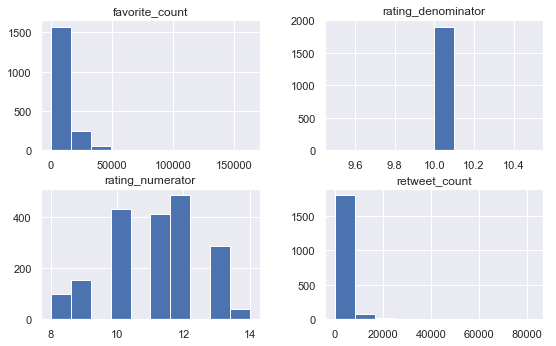

In [202]:
archive_new.hist(figsize=(9,5.5));

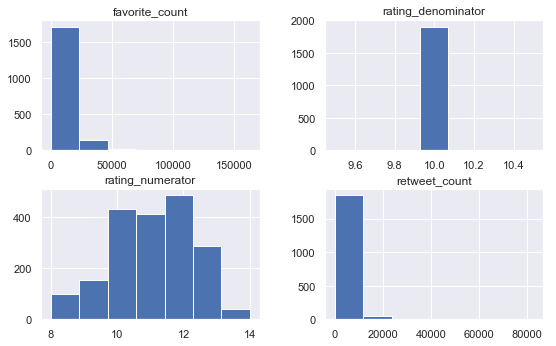

In [203]:
archive_new.hist(figsize=(9,5.5), bins=7);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


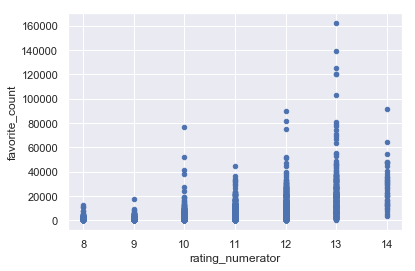

In [204]:
archive_new.plot(x = 'rating_numerator', y = 'favorite_count', kind = 'scatter');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


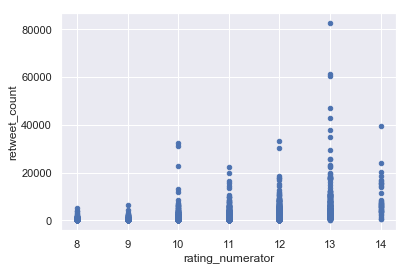

In [205]:
archive_new.plot(x = 'rating_numerator', y = 'retweet_count', kind = 'scatter');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


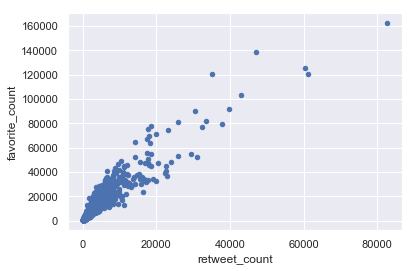

In [206]:
archive_new.plot(x = 'retweet_count', y = 'favorite_count', kind = 'scatter');

A first look at the data reveals that there is a correlation between rating_numerator and retweet_count, and rating_numerator and favorite_count. The correlation does not look that strong.

When we look the scatter plot for retweet_count and favorite_count we can see a strong positive correlation between these two variables. That make sense, since tweets that are more popular tend to have increased retweets and favorites.

We can also look at the actual correlation numbers programmatically:

In [207]:
archive_new.corr()

rating_numerator  rating_denominator  retweet_count  \
rating_numerator            1.000000                 NaN       0.364328   
rating_denominator               NaN                 NaN            NaN   
retweet_count               0.364328                 NaN       1.000000   
favorite_count              0.470231                 NaN       0.927202   

                    favorite_count  
rating_numerator          0.470231  
rating_denominator             NaN  
retweet_count             0.927202  
favorite_count            1.000000

### Numerator rating of the top retweeted and favorite posts

In [208]:
# top tweets by number of retweets
archive_new.retweet_count.sort_values(ascending = False).head()

801    82690
838    61216
412    60311
320    47138
59     42968
Name: retweet_count, dtype: int64

In [209]:
# index of top retweets descending
index_temp = archive_new.retweet_count.sort_values(ascending = False).index

In [210]:
# index of top favorites descending
index_temp2 = archive_new.favorite_count.sort_values(ascending = False).index

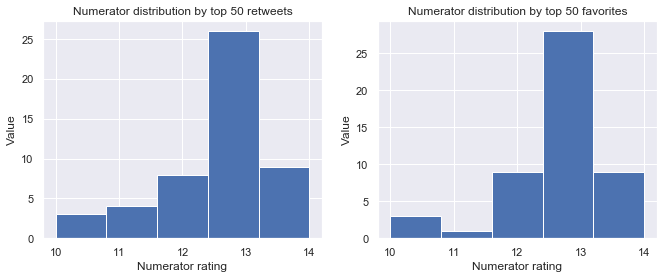

In [211]:
fig, axes = plt.subplots(1, 2)
archive_new.loc[index_temp].head(50).rating_numerator.hist(ax = axes[0], bins = 5, figsize = (11,4))
archive_new.loc[index_temp2].head(50).rating_numerator.hist(ax = axes[1], bins = 5)

axes[0].set(xlabel='Numerator rating', ylabel='Value', title = 'Numerator distribution by top 50 retweets')
axes[1].set(xlabel='Numerator rating', ylabel='Value', title = 'Numerator distribution by top 50 favorites');

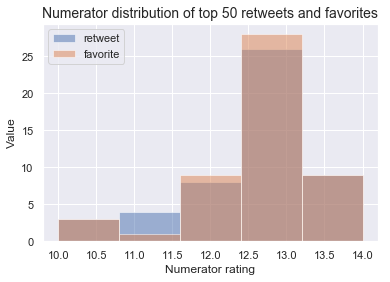

In [212]:
archive_new.loc[index_temp].head(50).rating_numerator.hist(alpha = 0.5, bins = 5, label = 'retweet')
archive_new.loc[index_temp2].head(50).rating_numerator.hist(alpha = 0.5, bins = 5, label = 'favorite')
plt.title("Numerator distribution of top 50 retweets and favorites", fontdict={'fontsize':14})
plt.xlabel("Numerator rating")
plt.ylabel("Value");
plt.legend();

Numerator rating distributions by top 50 retweeted posts and top 50 favorite posts are almost identical!

The denominator is always 10 in my analysis, so I focus only in the numerator.

We see that the majority of the tweets with high number of retweets and favorites have high score, numerator >=13.
We can also notice that there are a few tweets and favorites with a low numerator value 10 among the top 50.

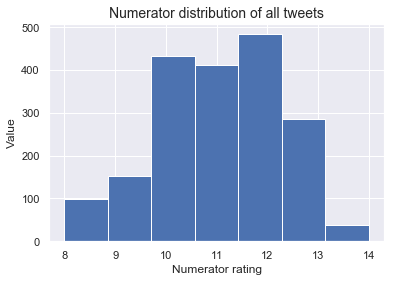

In [213]:
# distribution of numerator for all tweets
archive_new.rating_numerator.hist(bins = 7)
plt.title("Numerator distribution of all tweets", fontdict={'fontsize':14})
plt.xlabel("Numerator rating")
plt.ylabel("Value");

The distribution of the numerators of all tweets shows that the majority of values are between 10 and 12.

In [214]:
# Explore those tweets with low scores that were among thet top retweeted
archive_new.loc[index_temp].head(50)[archive_new.loc[index_temp].head(50).rating_numerator == 10]

tweet_id                 timestamp  \
1494  676219687039057920 2015-12-14 01:58:31+00:00   
659   761672994376806400 2016-08-05 21:19:27+00:00   
837   739544079319588864 2016-06-05 19:47:03+00:00   

                                                   text  \
1494  This is Kenneth. He's stuck in a bubble. 10/10...   
659   Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...   
837   This... is a Tyrannosaurus rex. We only rate d...   

                                          expanded_urls  rating_numerator  \
1494  https://twitter.com/dog_rates/status/676219687...                10   
659   https://twitter.com/dog_rates/status/761672994...                10   
837   https://twitter.com/dog_rates/status/739544079...                10   

      rating_denominator     name dog_type  retweet_count  favorite_count  
1494                  10  Kenneth      NaN          32311           77182  
659                   10      NaN      NaN          31044           51960  
837                   10      NaN      NaN          22566           41094

In [215]:
# Explore those tweets with low scores that were among thet top favorite
archive_new.loc[index_temp2].head(50)[archive_new.loc[index_temp2].head(50).rating_numerator == 10]

tweet_id                 timestamp  \
1494  676219687039057920 2015-12-14 01:58:31+00:00   
659   761672994376806400 2016-08-05 21:19:27+00:00   
837   739544079319588864 2016-06-05 19:47:03+00:00   

                                                   text  \
1494  This is Kenneth. He's stuck in a bubble. 10/10...   
659   Ohboyohboyohboyohboyohboyohboyohboyohboyohboyo...   
837   This... is a Tyrannosaurus rex. We only rate d...   

                                          expanded_urls  rating_numerator  \
1494  https://twitter.com/dog_rates/status/676219687...                10   
659   https://twitter.com/dog_rates/status/761672994...                10   
837   https://twitter.com/dog_rates/status/739544079...                10   

      rating_denominator     name dog_type  retweet_count  favorite_count  
1494                  10  Kenneth      NaN          32311           77182  
659                   10      NaN      NaN          31044           51960  
837                   10      NaN      NaN          22566           41094

We see that are the same posts.

In [216]:
# let's have a look at the first instance
prediction_new[prediction_new.tweet_id == '676219687039057920']

tweet_id                                          jpg_url  \
512   676219687039057920  https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg   
2519  676219687039057920  https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg   
4526  676219687039057920  https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg   

      img_num  prediction_try image_prediction  confidence  dog_predicted  
512         1               1           bubble    0.997556          False  
2519        1               2       leafhopper    0.000159          False  
4526        1               3          whippet    0.000132           True

Let's have a look at the image:

In [217]:
response = requests.get('https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg')
img = Image.open(BytesIO(response.content))

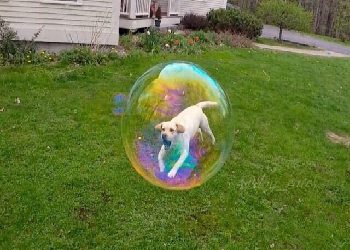

In [218]:
img.resize((350,250))

The image has a low score because the dog is trapped in a bubble! It is of course very popular post with high count of retweets and favorites.

Code sources for image displaying and handling:

- https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python
- https://pillow.readthedocs.io/en/stable/reference/Image.html

In [219]:
archive_new.loc[index_temp].head(50).rating_numerator.median(), archive_new.loc[index_temp2].head(50).rating_numerator.median()

(13.0, 13.0)

In [220]:
archive_new.loc[index_temp].rating_numerator.median()

11.0

We see that the median value of the numerators of the top 50 posts by retweet and favorite count is 13, while for the whole dataset is 11.

In [221]:
archive_new.describe()

rating_numerator  rating_denominator  retweet_count  favorite_count
count       1905.000000              1905.0    1905.000000     1905.000000
mean          11.074541                10.0    2827.066142     9218.633071
std            1.429619                 0.0    4866.917279    13006.746254
min            8.000000                10.0      11.000000       77.000000
25%           10.000000                10.0     626.000000     2123.000000
50%           11.000000                10.0    1401.000000     4325.000000
75%           12.000000                10.0    3257.000000    11677.000000
max           14.000000                10.0   82690.000000   162553.000000

### Retweet and favorite count by date

In [222]:
archive_new.timestamp.head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [223]:
archive_new.timestamp.tail()

1900   2015-11-16 00:55:59+00:00
1901   2015-11-16 00:49:46+00:00
1902   2015-11-16 00:30:50+00:00
1903   2015-11-15 23:21:54+00:00
1904   2015-11-15 22:32:08+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

It looks like the archive dataset is alrady sorted by datetime.

In [224]:
archive_new[['retweet_count', 'timestamp']].head()

retweet_count                 timestamp
0           8206 2017-08-01 16:23:56+00:00
1           6071 2017-08-01 00:17:27+00:00
2           4012 2017-07-31 00:18:03+00:00
3           8367 2017-07-30 15:58:51+00:00
4           9063 2017-07-29 16:00:24+00:00

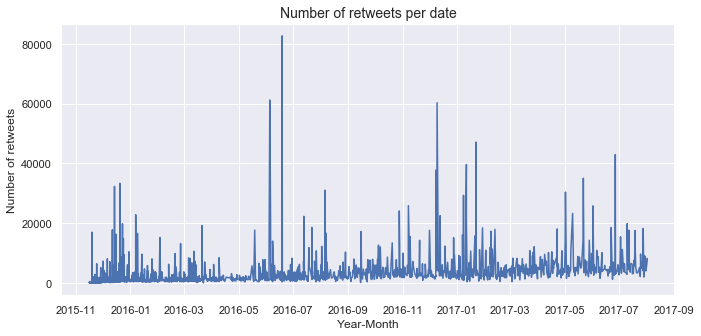

In [225]:
plt.subplots(figsize = (11,5))
plt.plot(archive_new.timestamp, archive_new.retweet_count)
plt.title("Number of retweets per date", fontdict={'fontsize':14})
plt.xlabel("Year-Month")
plt.ylabel("Number of retweets");

We can see that some tweets are very popular compared to others. In general the trend looks like it increases, i.e. higher number of retweets over the years. I can calculate the moving average in order to more clearly see the trend.

In [226]:
a = archive_new[['timestamp', 'retweet_count']].sort_values(by = 'timestamp').reset_index(drop = True)
a.head()

timestamp  retweet_count
0 2015-11-15 22:32:08+00:00            496
1 2015-11-15 23:21:54+00:00             43
2 2015-11-16 00:30:50+00:00             57
3 2015-11-16 00:49:46+00:00            235
4 2015-11-16 00:55:59+00:00            138

In [227]:
# moving average per 10 days
b = a.rolling('10d', on='timestamp').mean().retweet_count

In [228]:
# calculate moving average per 20 instances
# b = a.retweet_count.rolling(window = 20).mean()

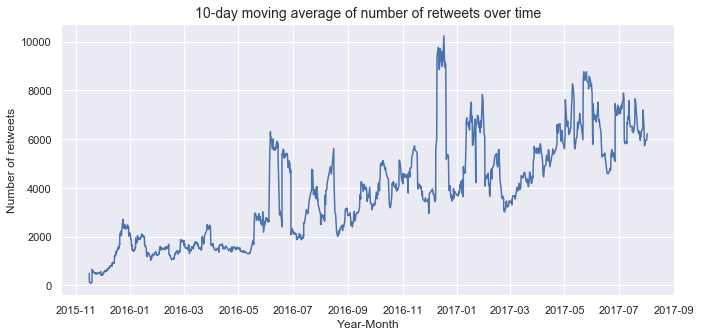

In [229]:
plt.subplots(figsize = (11,5))
plt.plot(a.timestamp, b)
plt.title("10-day moving average of number of retweets over time", fontdict={'fontsize':14})
plt.xlabel("Year-Month")
plt.ylabel("Number of retweets");

Indeed, when I calculate the 10-day moving average of the number of retweets, the trend is increasing. That can be  an indicator that the WeRateDogs page becomes more popular over time.

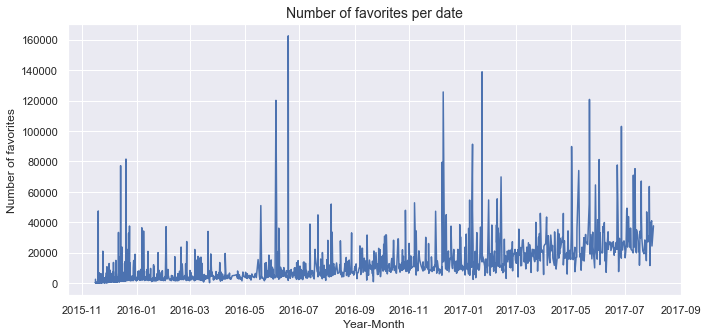

In [230]:
# Similarly for the favorite count
plt.subplots(figsize = (11,5))
plt.plot(archive_new.timestamp, archive_new.favorite_count)
plt.title("Number of favorites per date", fontdict={'fontsize':14})
plt.xlabel("Year-Month")
plt.ylabel("Number of favorites");

In this graph, it is more clear that the number that people favorite a tweet increases over time.

In [231]:
# Calculation of the 10-day moving average
c = archive_new[['timestamp', 'favorite_count']].sort_values(by = 'timestamp').reset_index(drop = True)
c.head()

timestamp  favorite_count
0 2015-11-15 22:32:08+00:00            2514
1 2015-11-15 23:21:54+00:00             121
2 2015-11-16 00:30:50+00:00             130
3 2015-11-16 00:49:46+00:00             426
4 2015-11-16 00:55:59+00:00             286

In [232]:
d = c.rolling('10d', on='timestamp').mean().favorite_count

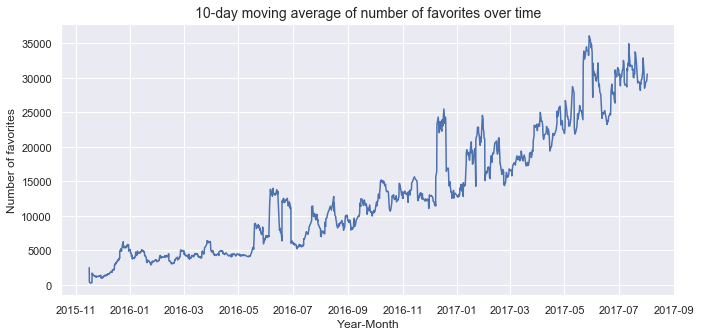

In [233]:
plt.subplots(figsize = (11,5))
plt.plot(c.timestamp, d)
plt.title("10-day moving average of number of favorites over time", fontdict={'fontsize':14})
plt.xlabel("Year-Month")
plt.ylabel("Number of favorites");

We can observe from the graph a large increase in the moving average number of favorites over the years.

Thus, both the number of retweets and favorites increases over the years, which is an indicator that the page becomes more popular.

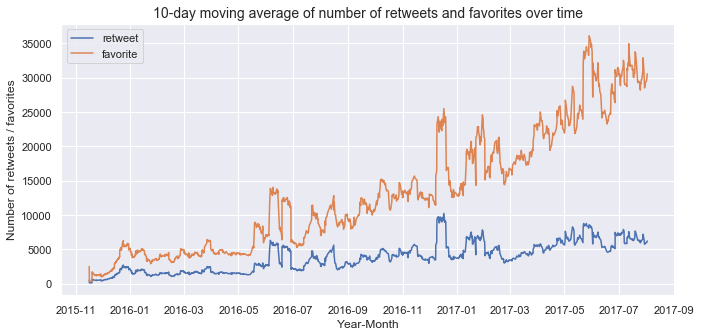

In [234]:
# Plot the 10-day retweet and favorite moving average together
plt.subplots(figsize = (11,5))
plt.plot(a.timestamp, b, label = 'retweet')
plt.plot(c.timestamp, d, label = 'favorite');
plt.title("10-day moving average of number of retweets and favorites over time", fontdict={'fontsize':14})
plt.xlabel("Year-Month")
plt.ylabel("Number of retweets / favorites")
plt.legend();

When we plot the 10-day moving average together, we can verify the strong positive correlation of the retweet and favorite count, as well as that the number of favorites is increasing at a much higher rate.

Code sources:
- https://stackoverflow.com/questions/15771472/pandas-rolling-mean-by-time-interval
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

### Number of tweets over time

Let's have a look at the number of tweets over time.

In [235]:
# per month
e = archive_new.resample('M', on = 'timestamp').count().retweet_count
e

timestamp
2015-11-30 00:00:00+00:00    232
2015-12-31 00:00:00+00:00    318
2016-01-31 00:00:00+00:00    166
2016-02-29 00:00:00+00:00    107
2016-03-31 00:00:00+00:00    120
2016-04-30 00:00:00+00:00     57
2016-05-31 00:00:00+00:00     57
2016-06-30 00:00:00+00:00     84
2016-07-31 00:00:00+00:00     90
2016-08-31 00:00:00+00:00     59
2016-09-30 00:00:00+00:00     66
2016-10-31 00:00:00+00:00     70
2016-11-30 00:00:00+00:00     54
2016-12-31 00:00:00+00:00     56
2017-01-31 00:00:00+00:00     68
2017-02-28 00:00:00+00:00     66
2017-03-31 00:00:00+00:00     52
2017-04-30 00:00:00+00:00     41
2017-05-31 00:00:00+00:00     43
2017-06-30 00:00:00+00:00     47
2017-07-31 00:00:00+00:00     50
2017-08-31 00:00:00+00:00      2
Freq: M, Name: retweet_count, dtype: int64

C:\Users\georg\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


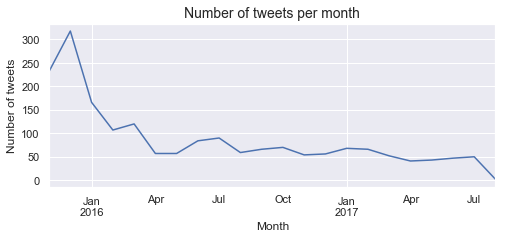

In [236]:
e.plot(figsize = (8,3))
plt.title("Number of tweets per month", fontdict={'fontsize':14})
plt.xlabel("Month")
plt.ylabel("Number of tweets");

We can see that the number of tweets of the WeRateDog page has dropped over time, from more than 200 tweets the first two months (November, December 2015) to about 40 to 50 tweets the last 5 months (March to July 2017). Maybe the page in the beggining was trying to build an audience and tweeted at a higher rate. The number of retweets and favorites however, has increased significantly over the years, indicating that the page becomes more popular even though it now tweets less.

However, for a most sophisticated analysis, one should also look at the number of followers and also look if the increase in popularity is only a result of an increase in the number of followers. It would be a good idea to perform a more quality exploration, in order to identify whether followers engage more or not with the tweets. Furthermore, data after August 2017 can be gathered through the twitter API, in order for us to be able to see the trends over the past two years and help as identify insights to furhter assist the growth of the WeRateDogs page.

Code sources:
- https://chrisalbon.com/python/data_wrangling/pandas_group_data_by_time/
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

### Popular dog types

In [237]:
a = archive_new.dog_type.value_counts()
a

pupper     223
doggo       89
puppo       28
floofer      9
Name: dog_type, dtype: int64

In total, the most dog types identified are puppers. Let's look at the top retweets the dog types:

In [238]:
# index of top retweets descending
index_temp = archive_new.retweet_count.sort_values(ascending = False).index

In [239]:
b = archive_new.loc[index_temp].head(50).dog_type.value_counts()
b

doggo      7
pupper     6
puppo      2
floofer    1
Name: dog_type, dtype: int64

Among the top tweets by the number of retweets, the most dog types identified are doggos, even though they are smaller number in total.

In [240]:
b['doggo']/a['doggo'], b['pupper']/a['pupper'], b['puppo']/a['puppo'], b['floofer']/a['floofer']

(0.07865168539325842,
 0.026905829596412557,
 0.07142857142857142,
 0.1111111111111111)

If we look at the percentage of dog types in the top 50 tweets by retweet, then floofer is the most popular one.

In [241]:
b = archive_new.loc[index_temp].head(100).dog_type.value_counts()
b

doggo      11
pupper      9
puppo       5
floofer     1
Name: dog_type, dtype: int64

In [242]:
b['doggo']/a['doggo'], b['pupper']/a['pupper'], b['puppo']/a['puppo'], b['floofer']/a['floofer']

(0.12359550561797752,
 0.04035874439461883,
 0.17857142857142858,
 0.1111111111111111)

When we look at the percentage of the top 100 tweets by retweet count, then the puppo is the most popular one. Of the top 100 tweets by retweet count, the total dog types recored are 26, which means only 26% of dogs have a type recorded.

In [243]:
# index of top favorites descending
index_temp2 = archive_new.favorite_count.sort_values(ascending = False).index

In [244]:
b = archive_new.loc[index_temp2].head(100).dog_type.value_counts()
b

doggo      11
pupper      8
puppo       5
floofer     1
Name: dog_type, dtype: int64

In [245]:
b['doggo']/a['doggo'], b['pupper']/a['pupper'], b['puppo']/a['puppo'], b['floofer']/a['floofer']

(0.12359550561797752,
 0.03587443946188341,
 0.17857142857142858,
 0.1111111111111111)

Similar results we get for the favorite count.

### Popular dog names

In [246]:
archive_new.name.value_counts().head(25)

Lucy       11
Oliver     10
Cooper     10
Charlie    10
Penny       9
Tucker      9
Winston     8
Sadie       8
Lola        8
Daisy       7
Oscar       6
Koda        6
Stanley     6
Jax         6
Bo          6
Bailey      6
Toby        6
Bella       5
Scout       5
Leo         5
Buddy       5
Milo        5
Louis       5
Bentley     5
Archie      4
Name: name, dtype: int64

In [247]:
# least popular names
archive_new.name.value_counts().tail(25)

Nida         1
Bell         1
Major        1
Jebberson    1
Geno         1
Aldrick      1
Holly        1
Chaz         1
Chubbs       1
Skittle      1
Geoff        1
Amélie       1
Jeffrie      1
DayZ         1
Filup        1
Chesney      1
Linus        1
Kenzie       1
Baloo        1
Jessiga      1
Fwed         1
Chase        1
Bloop        1
Noah         1
Zuzu         1
Name: name, dtype: int64

### Image prediction confidence

In [248]:
prediction_new.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num  prediction_try        image_prediction  confidence  dog_predicted  
0        1               1  Welsh_springer_spaniel    0.465074           True  
1        1               1                 redbone    0.506826           True  
2        1               1         German_shepherd    0.596461           True  
3        1               1     Rhodesian_ridgeback    0.408143           True  
4        1               1      miniature_pinscher    0.560311           True

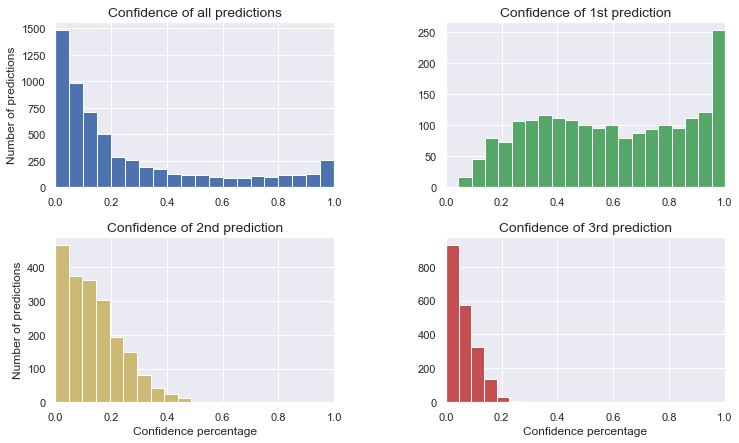

In [249]:
fig, axes = plt.subplots(2,2, figsize = (12,7))
fig.subplots_adjust(hspace=0.3, wspace=0.4)

prediction_new.confidence.hist(ax = axes[0,0], bins = 20)
prediction_new[prediction_new.prediction_try == 1].confidence.hist(ax = axes[0,1], color = 'g', bins = 20)
prediction_new[prediction_new.prediction_try == 2].confidence.hist(ax = axes[1,0], color = 'y', bins = 10)
prediction_new[prediction_new.prediction_try == 3].confidence.hist(ax = axes[1,1], color = 'r', bins = 6)

axes[0,0].set(xlabel='', ylabel='Number of predictions')
axes[0,0].set_title('Confidence of all predictions', fontsize = 13.8)
axes[0,0].set_xlim([0,1])

axes[0,1].set(xlabel='', ylabel='')
axes[0,1].set_title('Confidence of 1st prediction', fontsize = 13.8)
axes[0,1].set_xlim([0,1])

axes[1,0].set(xlabel='Confidence percentage', ylabel='Number of predictions')
axes[1,0].set_title('Confidence of 2nd prediction', fontsize = 13.8)
axes[1,0].set_xlim([0,1])

axes[1,1].set(xlabel='Confidence percentage', ylabel='')
axes[1,1].set_title('Confidence of 3rd prediction', fontsize = 13.8)
axes[1,1].set_xlim([0,1]);

We see that the distribution of the confidence in prediction is right skewed for all predictions as well as for 2nd and 3rd prediction. However for the first prediction, the confidence is almost equally distributed between 0.3 and 0.9, while there is a significant amount of  predictions with confidence higher than 0.9. However, we see that even for the 1st prediction there is overall a significant amount of predictions with low confidence.

The overall confidence in prediction for the majority of predictions is below 15%, as we can see in the blue histogram above. We can calculate the median values:

In [250]:
# indeed the median value for the confidence of all predictions is about 13.5%
prediction_new.confidence.median()

0.13458900000000001

In [251]:
# median of 1st prediction confidence
prediction_new[prediction_new.prediction_try == 1].confidence.median()

0.589011

In [252]:
# median of 2nd prediction confidence
prediction_new[prediction_new.prediction_try == 2].confidence.median()

0.117003

In [253]:
# median of 3rd prediction confidence
prediction_new[prediction_new.prediction_try == 3].confidence.median()

0.0494438

### Percentage of dog predictions

In [254]:
# all predictions
prediction_new.dog_predicted.mean()

0.7350938382328517

For about 74% of the images, a dog is predicted.

In [255]:
# 1st prediction
prediction_new[prediction_new.prediction_try == 1].dog_predicted.mean()

0.7364225211758844

In [256]:
# 2nd prediction
prediction_new[prediction_new.prediction_try == 2].dog_predicted.mean()

0.746885899352267

In [257]:
# 3rd prediction
prediction_new[prediction_new.prediction_try == 3].dog_predicted.mean()

0.7219730941704036

All predictions have about the same level of dog predictions! That means that, the algorithm in all prediction attempts identifies with about the same percentage that it is not a dog in the image and tries to identify what the image is about.

### Image prediction examples

In [258]:
prediction_new.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num  prediction_try        image_prediction  confidence  dog_predicted  
0        1               1  Welsh_springer_spaniel    0.465074           True  
1        1               1                 redbone    0.506826           True  
2        1               1         German_shepherd    0.596461           True  
3        1               1     Rhodesian_ridgeback    0.408143           True  
4        1               1      miniature_pinscher    0.560311           True

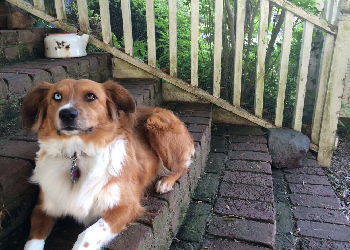

In [259]:
# 1st prediction image with 0.46 confidence
response = requests.get('https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg')
img = Image.open(BytesIO(response.content))
img.resize((350,250))

In [260]:
prediction_new[prediction_new.confidence > 0.9].head()

tweet_id                                          jpg_url  \
6   666051853826850816  https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
8   666057090499244032  https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
17  666104133288665088  https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
21  666293911632134144  https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
25  666362758909284353  https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   

    img_num  prediction_try  image_prediction  confidence  dog_predicted  
6         1               1        box_turtle    0.933012          False  
8         1               1     shopping_cart    0.962465          False  
17        1               1               hen    0.965932          False  
21        1               1  three-toed_sloth    0.914671          False  
25        1               1        guinea_pig    0.996496          False

Interestingly, some 1st predictions with high level of confidence are not dogs. Let's check the one that has been identified as a hen.

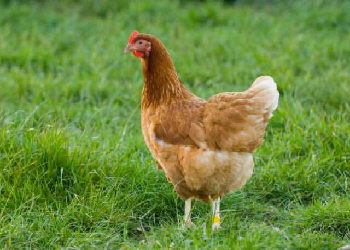

In [261]:
response = requests.get('https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg')
img = Image.open(BytesIO(response.content))
img.resize((350,250))

In [262]:
# let's explore some instances identified as dogs with high confidence 
prediction_new[(prediction_new.confidence > 0.9) & (prediction_new.dog_predicted == 1)].head()

tweet_id                                          jpg_url  \
27  666396247373291520  https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
31  666421158376562688  https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
40  666691418707132416  https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
58  667090893657276420  https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg   
68  667182792070062081  https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg   

    img_num  prediction_try  image_prediction  confidence  dog_predicted  
27        1               1         Chihuahua    0.978108           True  
31        1               1  Blenheim_spaniel    0.906777           True  
40        1               1   German_shepherd    0.975401           True  
58        1               1         Chihuahua    0.959514           True  
68        1               1  golden_retriever    0.949892           True

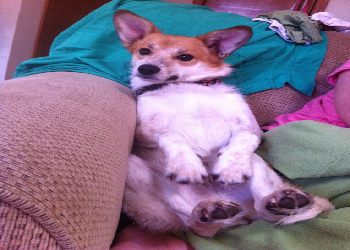

In [263]:
response = requests.get('https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg')
img = Image.open(BytesIO(response.content))
img.resize((350,250))

This dog has been identified as a Chihuahua with confidence about 98%. However, it does not look as a Chihuahua. Let's check the rest of predictions:

In [264]:
prediction_new[prediction_new.tweet_id == '666396247373291520']

tweet_id                                          jpg_url  \
27    666396247373291520  https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
2034  666396247373291520  https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
4041  666396247373291520  https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   

      img_num  prediction_try image_prediction  confidence  dog_predicted  
27          1               1        Chihuahua    0.978108           True  
2034        1               2      toy_terrier    0.009397           True  
4041        1               3         papillon    0.004577           True

I would say that this dog looks more like a jack russell terrier, so maybe toy terrier identificaton with a very low confidence is more close to be correct.

In [265]:
prediction_new[(prediction_new.confidence > 0.9) & (prediction_new.dog_predicted == 1)].head()

tweet_id                                          jpg_url  \
27  666396247373291520  https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
31  666421158376562688  https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg   
40  666691418707132416  https://pbs.twimg.com/media/CUCQTpEWEAA7EDz.jpg   
58  667090893657276420  https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg   
68  667182792070062081  https://pbs.twimg.com/media/CUJPNjOWsAAZRqP.jpg   

    img_num  prediction_try  image_prediction  confidence  dog_predicted  
27        1               1         Chihuahua    0.978108           True  
31        1               1  Blenheim_spaniel    0.906777           True  
40        1               1   German_shepherd    0.975401           True  
58        1               1         Chihuahua    0.959514           True  
68        1               1  golden_retriever    0.949892           True

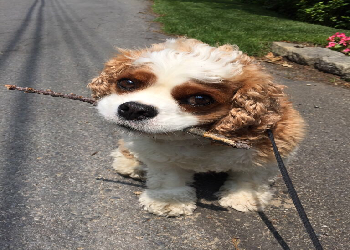

In [266]:
# Other dog photos
response = requests.get('https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg')
img = Image.open(BytesIO(response.content))
img.resize((350,250))

### Popular photos

In [267]:
# top 10 tweets by number of retweets
a = archive_new.sort_values('retweet_count', ascending = False).tweet_id.head(10)
a

801     744234799360020481
838     739238157791694849
412     807106840509214720
320     822872901745569793
59      879415818425184262
344     819004803107983360
414     806629075125202948
113     866450705531457537
1438    678399652199309312
1494    676219687039057920
Name: tweet_id, dtype: object

In [268]:
# photos of the top 10 retweets
b = prediction_new[prediction_new.tweet_id.isin(a)]
b.head(10)

tweet_id                                            jpg_url  \
512   676219687039057920    https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg   
570   678399652199309312  https://pbs.twimg.com/ext_tw_video_thumb/67839...   
1184  739238157791694849  https://pbs.twimg.com/ext_tw_video_thumb/73923...   
1219  744234799360020481  https://pbs.twimg.com/ext_tw_video_thumb/74423...   
1595  806629075125202948    https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg   
1597  807106840509214720  https://pbs.twimg.com/ext_tw_video_thumb/80710...   
1664  819004803107983360    https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg   
1688  822872901745569793    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg   
1896  866450705531457537    https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg   
1948  879415818425184262  https://pbs.twimg.com/ext_tw_video_thumb/87941...   

      img_num  prediction_try    image_prediction  confidence  dog_predicted  
512         1               1              bubble    0.997556          False  
570         1               1               swing    0.929196          False  
1184        1               1          Eskimo_dog    0.503372           True  
1219        1               1  Labrador_retriever    0.825333           True  
1595        2               1       Arabian_camel    0.366248          False  
1597        1               1           Chihuahua    0.505370           True  
1664        1               1     standard_poodle    0.351308           True  
1688        1               1    Lakeland_terrier    0.196015           True  
1896        2               1      French_bulldog    0.905334           True  
1948        1               1    English_springer    0.383404           True

Interestingly, among the most popular tweets by number of retweets, half of them are videos and not photos.

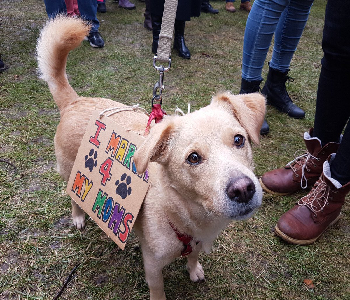

In [269]:
# The 4th most popular retweet is a photo:
response = requests.get('https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg')
img = Image.open(BytesIO(response.content))
img.resize((350,300))

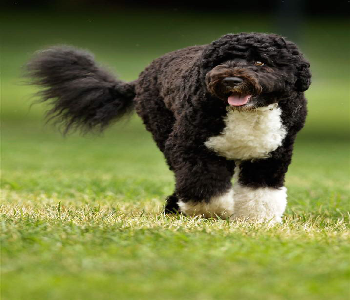

In [270]:
response = requests.get('https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg')
img = Image.open(BytesIO(response.content))
img.resize((350,300))

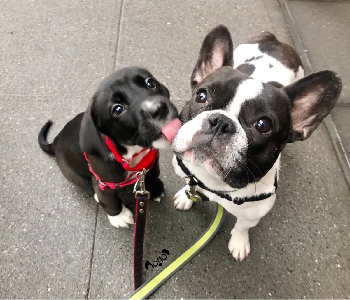

In [271]:
response = requests.get('https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg')
img = Image.open(BytesIO(response.content))
img.resize((350,300))

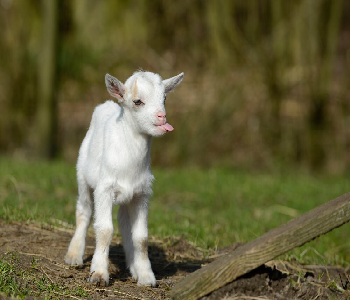

In [272]:
# other random photos...
response = requests.get('https://pbs.twimg.com/media/C8V0aI5V0AAgO9m.jpg')
img = Image.open(BytesIO(response.content))
img.resize((350,300))

This goat(?) was identified as a dog! 

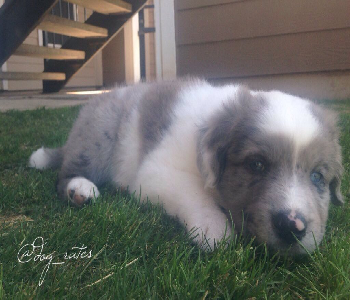

In [273]:
# other random photos...
response = requests.get('https://pbs.twimg.com/media/ChvAQuMWMAAVaKD.jpg')
img = Image.open(BytesIO(response.content))
img.resize((350,300))

### Conclusions
Various quality and tidiness issues were found in the datasets. I cleaned some of these issues, however, more issues cound be explored and cleaned. For example, in the text of the tweets in the archive dataset, there is short link that is not useful and could be cleaned. Or I could keep the short link instead of the expanded url column. Other issues that I didn't explore are with regard to the names of the dogs. I have cleaned the erroneous names; however, in the future I can explore if a name is contained in the text of the tweet without being recorded in the name column. I can also do that for the numerator and denominator ratings and identify in the text scores that might have not been recorded correcltly in the relevant rating columns. Another idea can be to gather the ratings in one column, instead of having them in two separate columns.

Also, I could have treated in a different way some of the issues identified. For example, the way I treat the numerator and denominator values, e.g. by keeping the numerator values between 8 and 14, I could have use all the ratings available. It depends on the analysis and questions one would like to explore in the dataset. I can always go back in the data cleaning steps and treat them in a different way. More discussion can be found in the submitted report.